# 08 그래프 만들기

### 학습목표
#### 08-1 파이썬으로 만들수 있는 그래프 살펴보기
#### 08-2 산점도 - 변수 간 관계 표현하기
#### 08-3 막대 그래프 - 집단 간 차이 표현하기
#### 08-4 시계열 그래프 - 시간에 따라 달라지는 데이터 표현하기
#### 08-5 상자그림 - 집단 간 분포 차이 표현하기

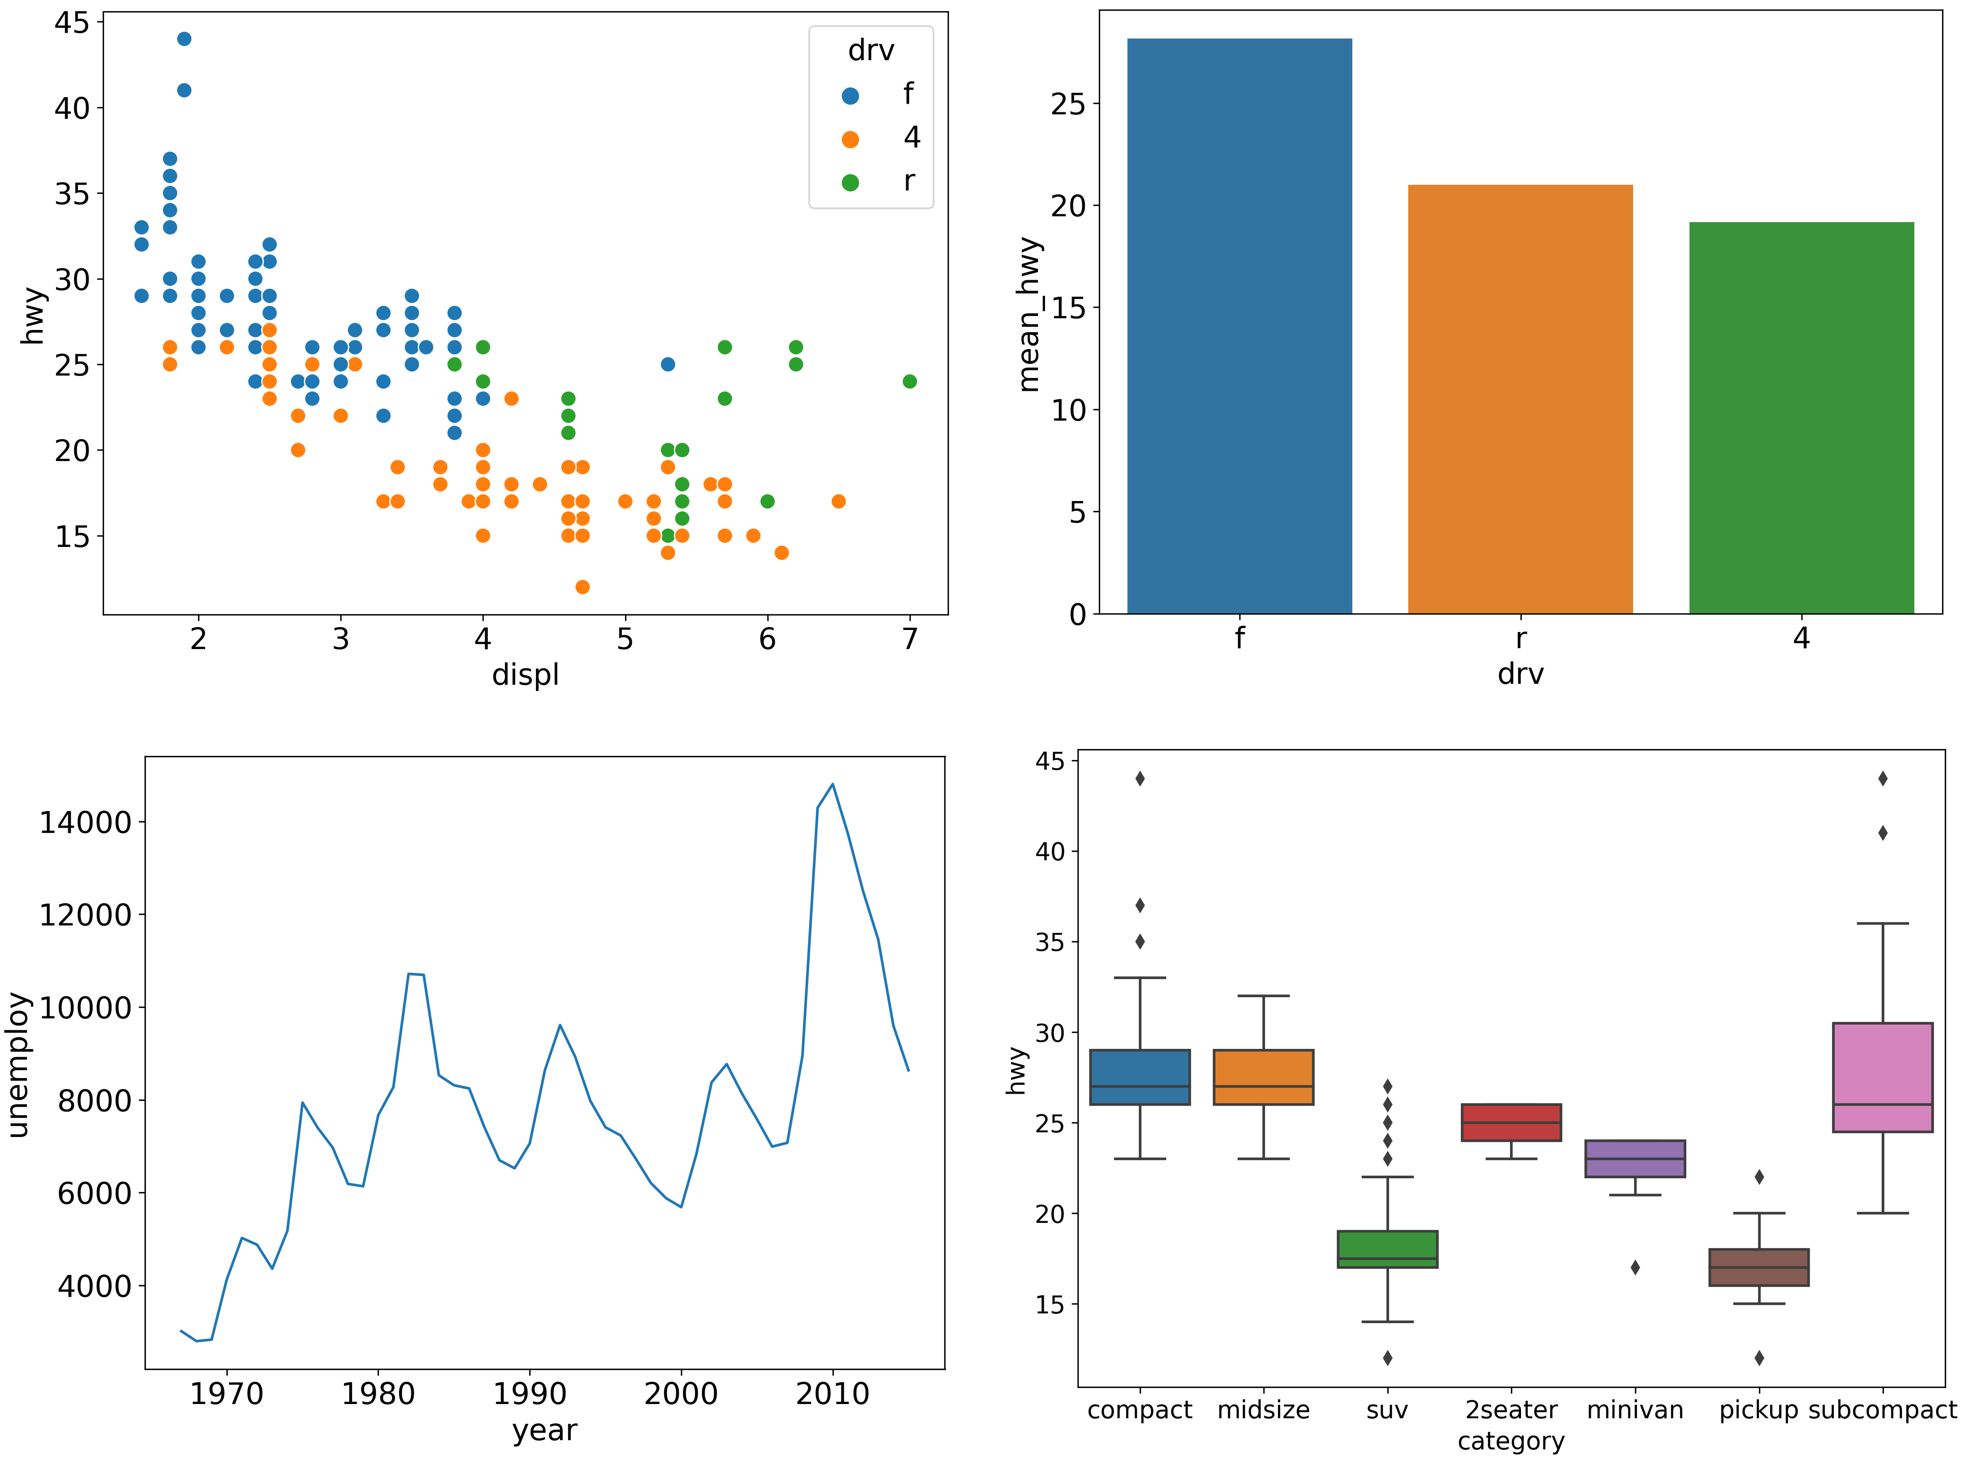

## 08-1 파이썬으로 만들 수 있는 그래프 살펴 보기

- seaborn 사이트 살펴 보기 : https://seaborn.pydata.org/
- Gallery에 다양한 그래프 살펴보기

<Axes: xlabel='timepoint', ylabel='signal'>

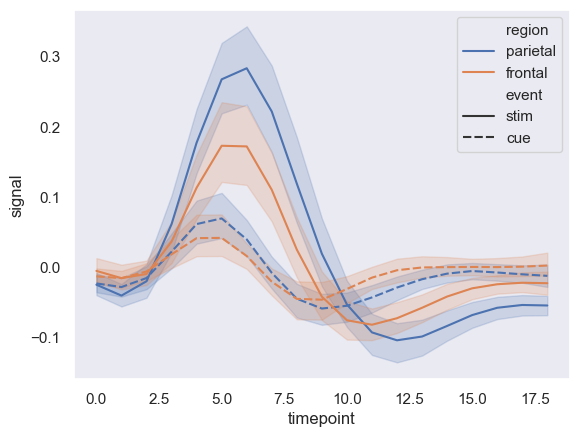

In [5]:
import seaborn as sns
sns.set_theme(style="dark")
#style : whitegrid, darkgrid, ticks, white, dark

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style='event',
             data=fmri)


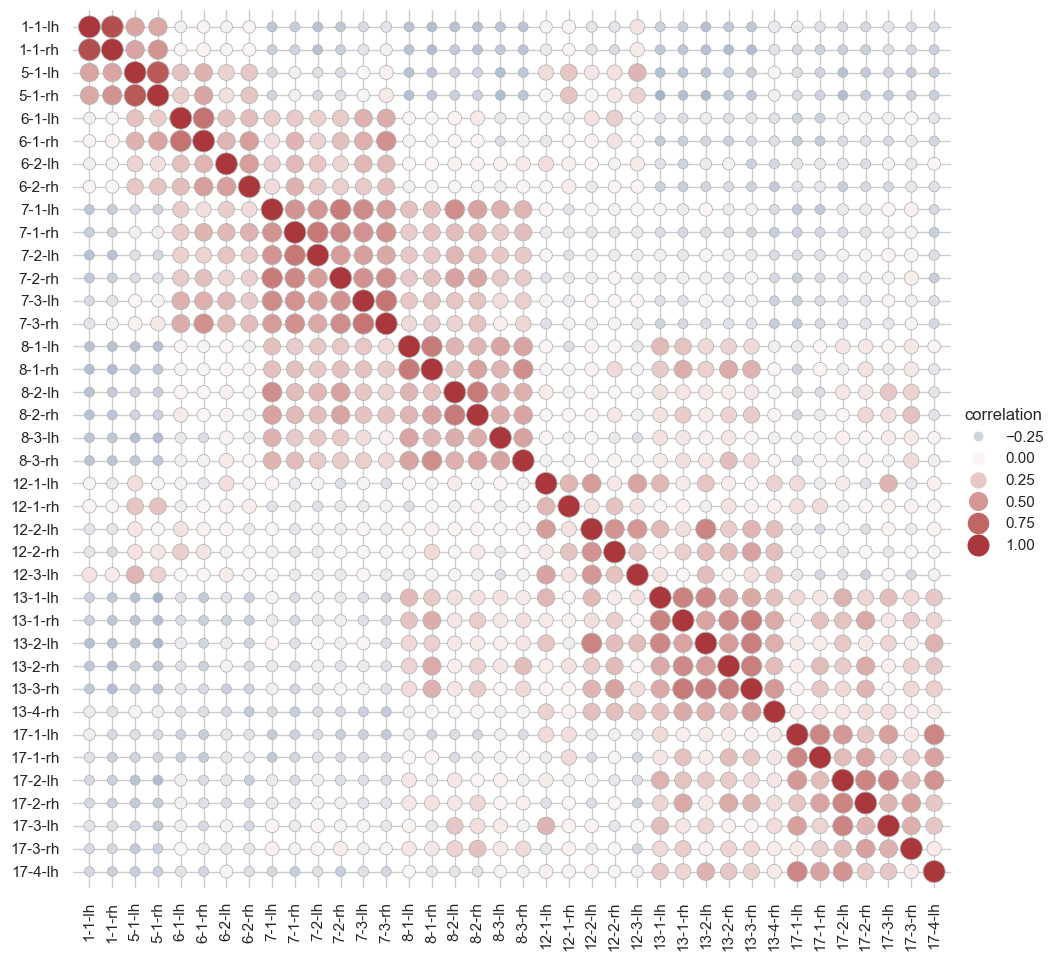

In [6]:
import seaborn as sns


sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
#for artist in g.legend.legendHandles:
#    artist.set_edgecolor(".7")


    

In [7]:
import seaborn as sns
# 미리설정할것 

# graph 관련 warning 이 나오지 않게 세팅하기
import warnings
warnings.filterwarnings(action='ignore')
#warning이 원래 기본 세팅으로 변경하기 (기본세팅 = warning 표시)
#warnings.filterwarnings(action='default') 

#2. 한글 폰트 설정
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# font를 나눔고딕으로 세팅 'NanumGothic'  - windows
plt.rcParams['font.family'] = 'NanumGothic'

# 맑은고딕 - windows
#plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family']
# 애플고딕 - Mac OS
#plt.rcParams['font.family'] = 'AppleGothic'

# anaconda가 설치된 이후, 폰트를 다운받은 경우에는 anaconda가 폰트를 인식하지 못함. 
# mpl.get_configdir()을 실행하여, 해당 디렉토리를 삭제함. 보통 'C:\\Users\\사용자명\\.matplotlib'
# jupyter notebook 서버를 껏다가 다시 켬. 
# 'C:\\Users\\사용자명\\.matplotlib\\fontlist-v~.json'에 설치한 한글 파일이 있으면 성공 

#import matplotlib as mpl
#mpl.get_configdir()

In [8]:
# anaconda가 설치된 이후, 폰트를 다운받은 경우에는 anaconda가 폰트를 인식하지 못함. 
# mpl.get_configdir()을 실행하여, 해당 디렉토리를 삭제함. 보통 'C:\\Users\\사용자명\\.matplotlib'
# jupyter notebook 서버를 껏다가 다시 켬. 
# 'C:\\Users\\사용자명\\.matplotlib\\fontlist-v~.json'에 설치한 한글 파일이 있으면 성공 

import matplotlib as mpl
mpl.get_configdir()

'C:\\Users\\user\\.matplotlib'

## 08-2 산점도 - 변수 간 관계 표현하기

- 데이터를 x축과 y축에 점으로 표현한 그래프
- 나이와 따른 소득 처럼 연속된 값으로 된 두 변수의 관계를 표현할 때 사용

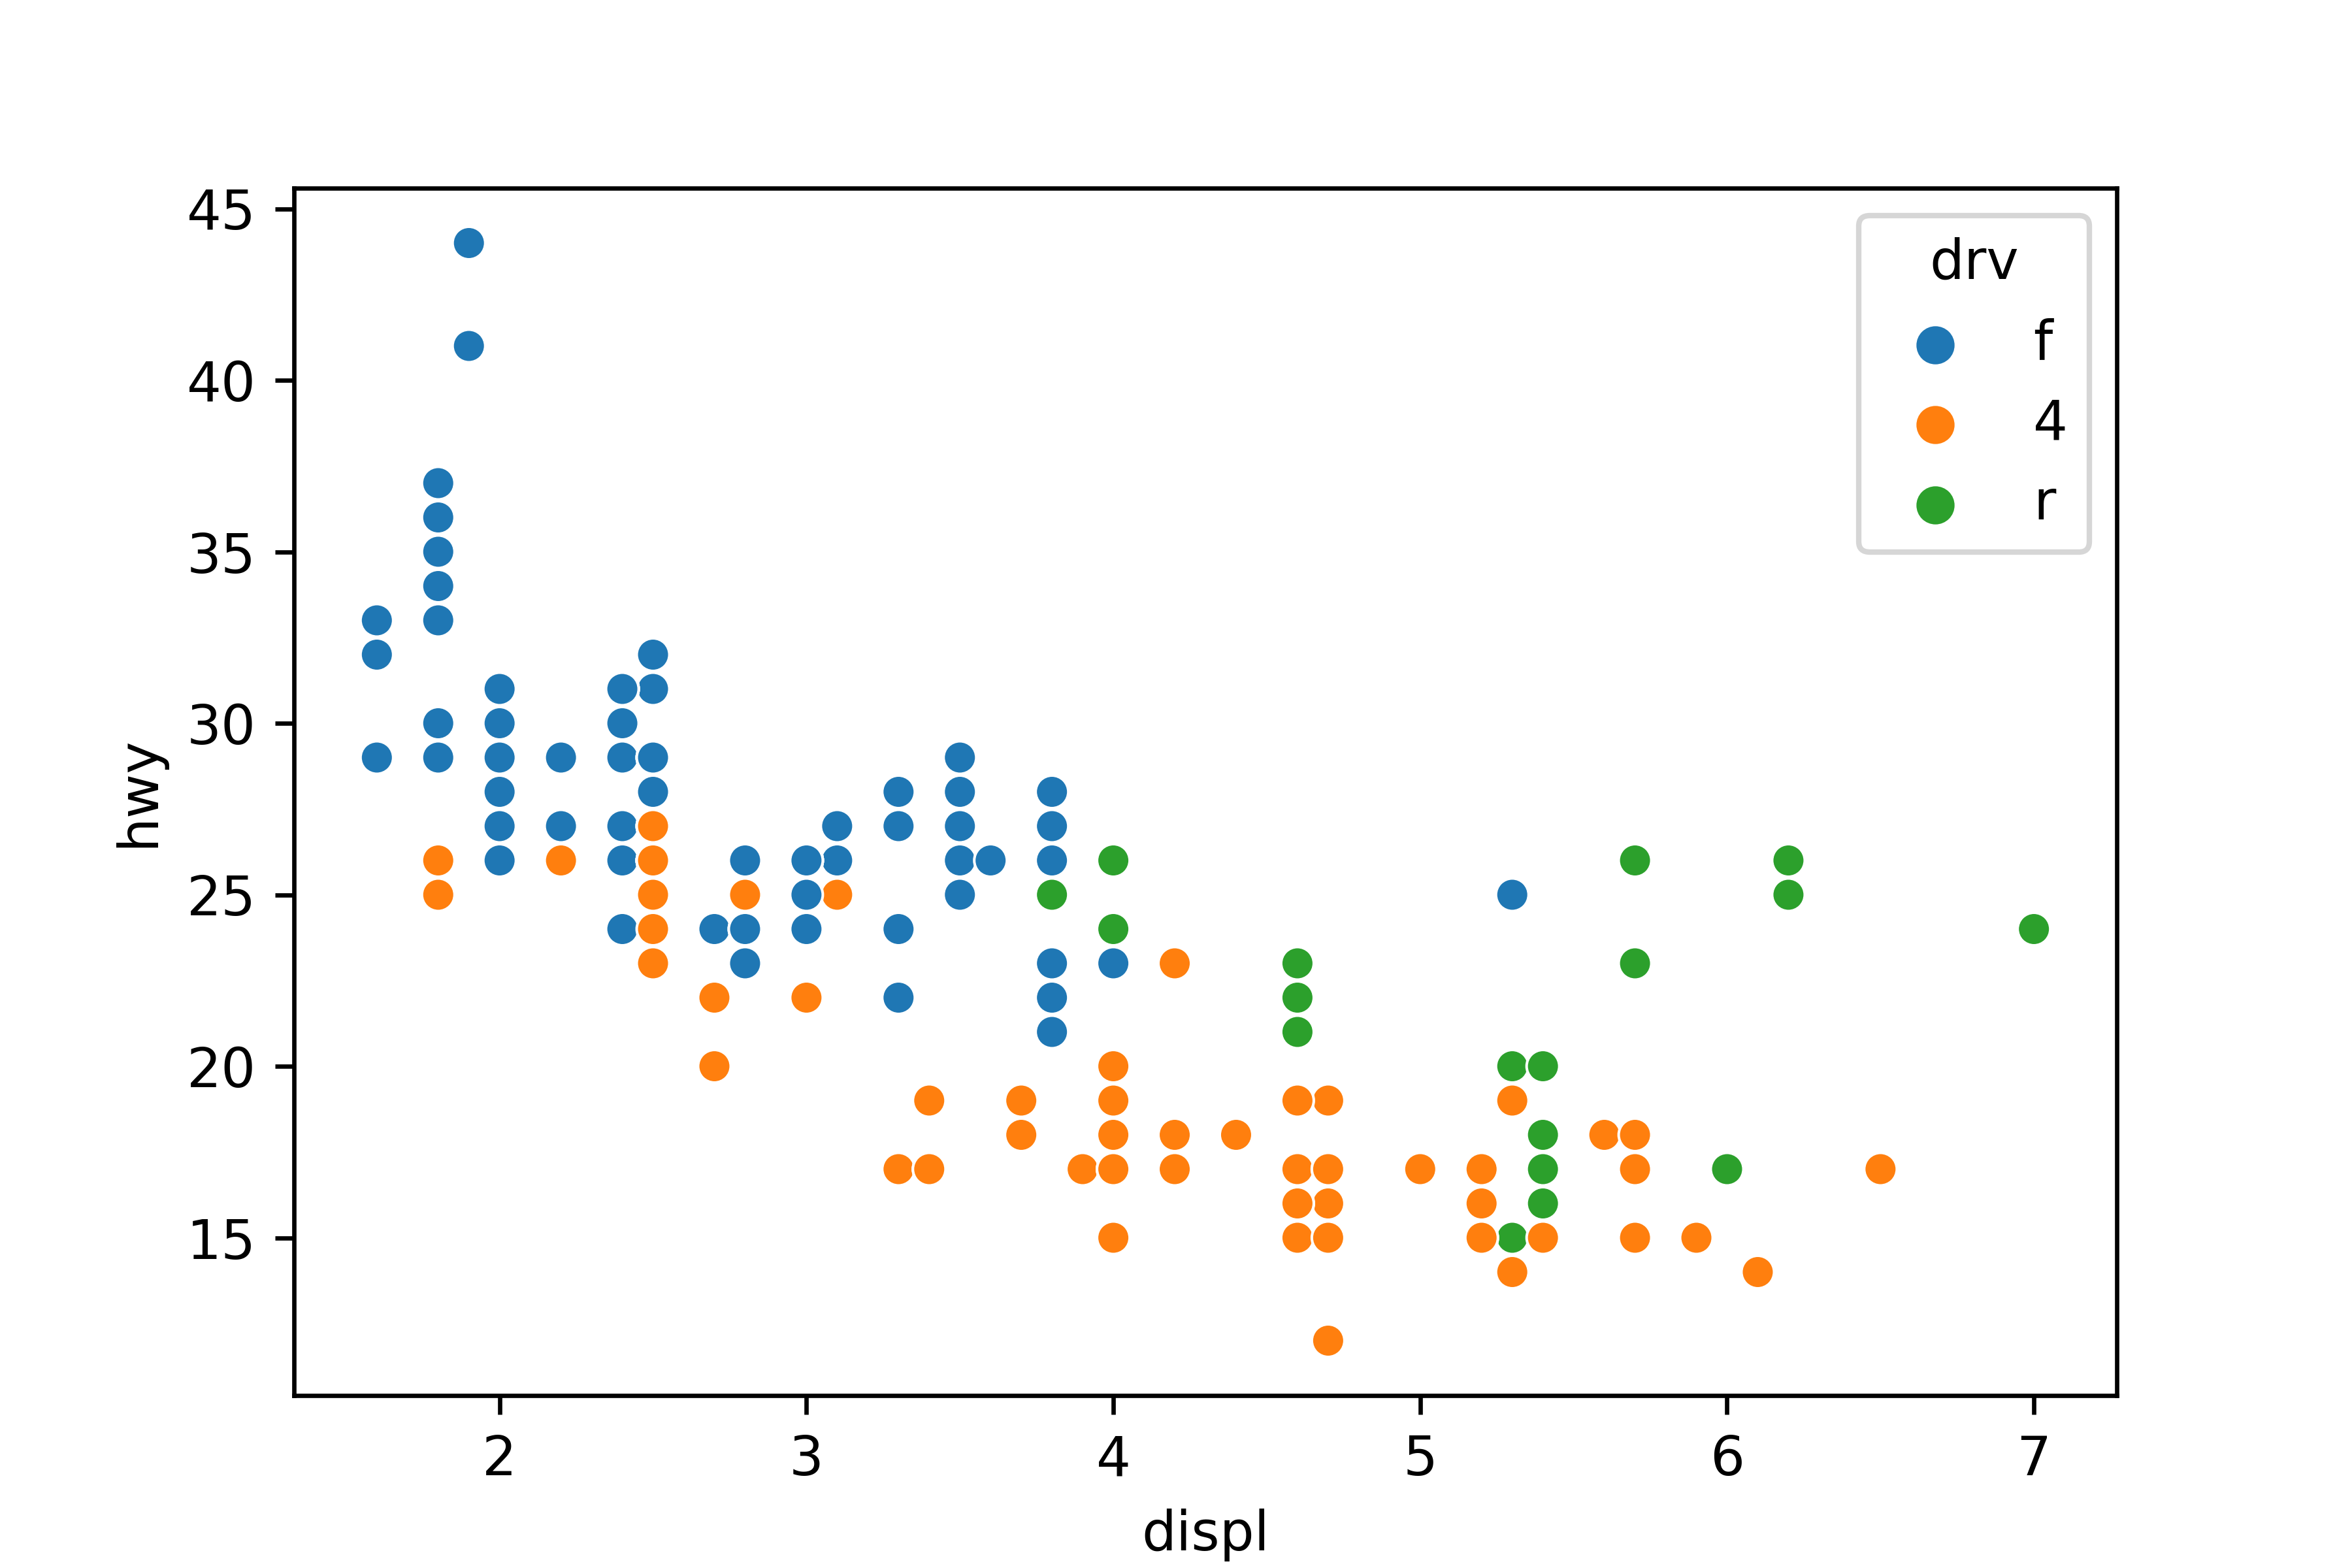

In [10]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

In [11]:
import seaborn as sns

<Axes: xlabel='displ', ylabel='hwy'>

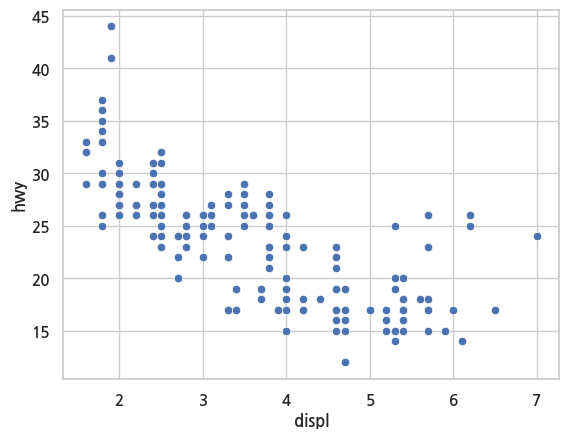

In [12]:
# 배기량(displ)에 따른 고속도로 연비(hwy)의 관계 표시
sns.scatterplot(data=mpg, x='displ', y='hwy')

[(3.0, 6.0)]

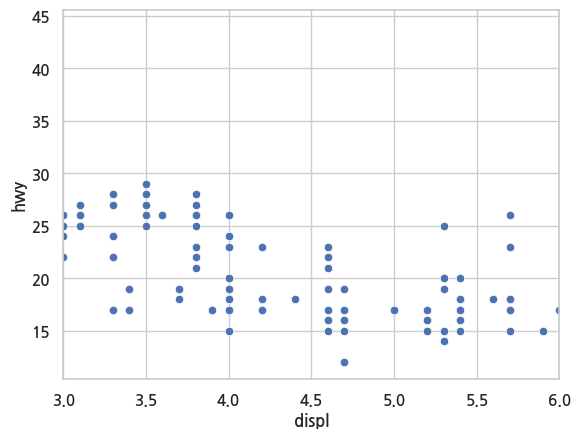

In [13]:
# x 축 범위 설정
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim = (3, 6))

[(15.0, 30.0)]

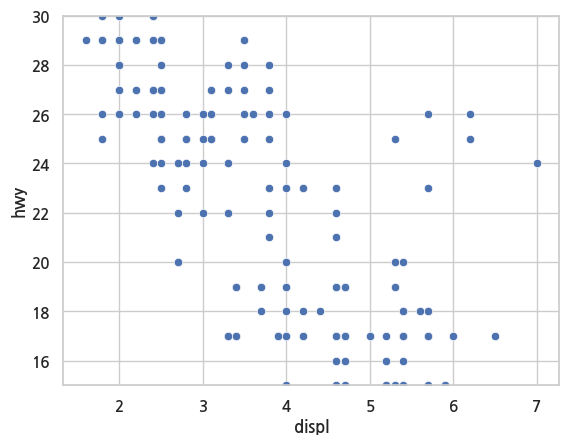

In [14]:
# y축 범위 설정
sns.scatterplot(data=mpg, x='displ', y='hwy').set(ylim=(15,30))

[(3.0, 6.0), (10.0, 30.0)]

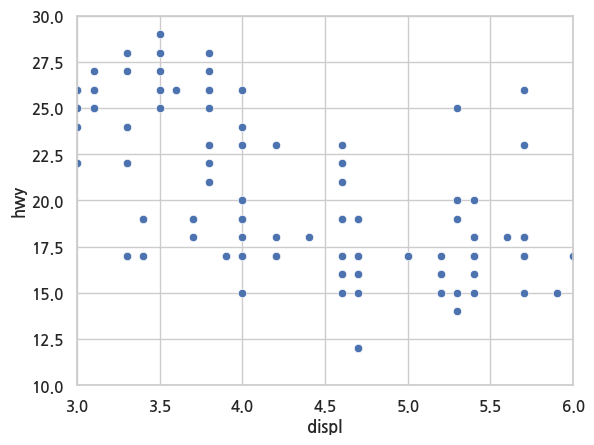

In [15]:
# x, y 축 범위 설정
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim = (3, 6), ylim = (10, 30))

<Axes: xlabel='displ', ylabel='hwy'>

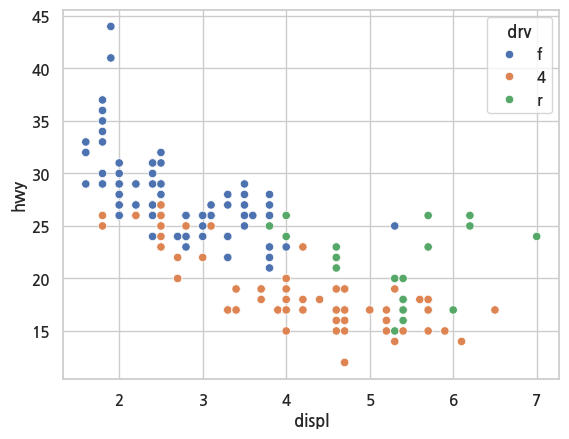

In [16]:
# 배기량(disp)에 따른 고속도로 연비(hwy)의 관계 표시, 구동방식(drv)에 따라 색깔 표시
sns.scatterplot(data=mpg, x='displ', y='hwy', hue = 'drv')

# 색을 'category'로 변경하려면?
#sns.scatterplot(data=mpg, x='displ', y='hwy', hue = 'category')

## Lab 1 : 혼자서 해보기
- mpg와 midwest 데이터를 이용하여 데이터 분석

> Q1 : mpg 데이터에서 도시연비(cty)와 고속도로 연비(hwy)사이에 관계를 알아보려고 함
- x축은 cty, y축은 hwy로된 산점도를 표시하시오
- 서로 양의 상관관계가 있음을 추정할 수 있음

<Axes: xlabel='cty', ylabel='hwy'>

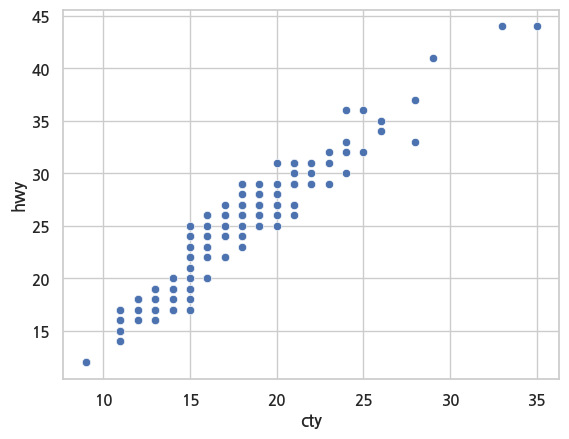

In [19]:
sns.scatterplot(data=mpg, x='cty', y='hwy')
#sns.scatterplot(data=mpg, x='cty', y='hwy', hue='category')

> Q2 : 미국 지역별 인구 정보 데이터 midwest.csv를 이용하여 분석한다
- x축은 지역별 전체 인구(poptotal)
- y축은 아시아계 인구(popasian)
- 전체 인구는 50만명 이하, 아시아 인구는 1만명 이하 지역만 산점도에 표시함

In [21]:
midwest = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

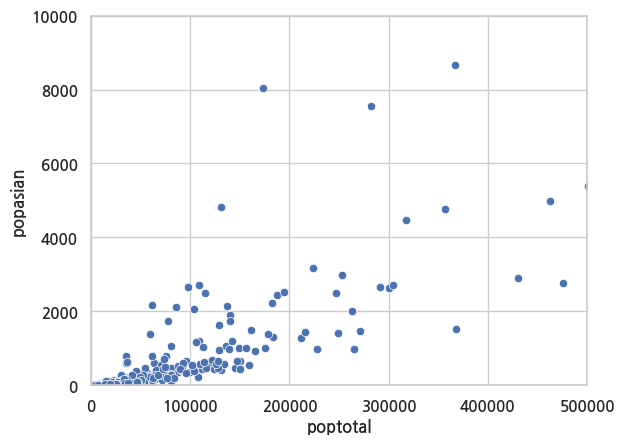

In [22]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian').set( xlim = (0, 500000), ylim=(0, 10000))

## 08-3 막대 그래프 - 집단 간 차이 표현하기

- 데이터의 크기를 막대의 길이로 표현한 그래프
- 성별 소득 차이 처럼 집단 간 차이를 표시할 때 사용
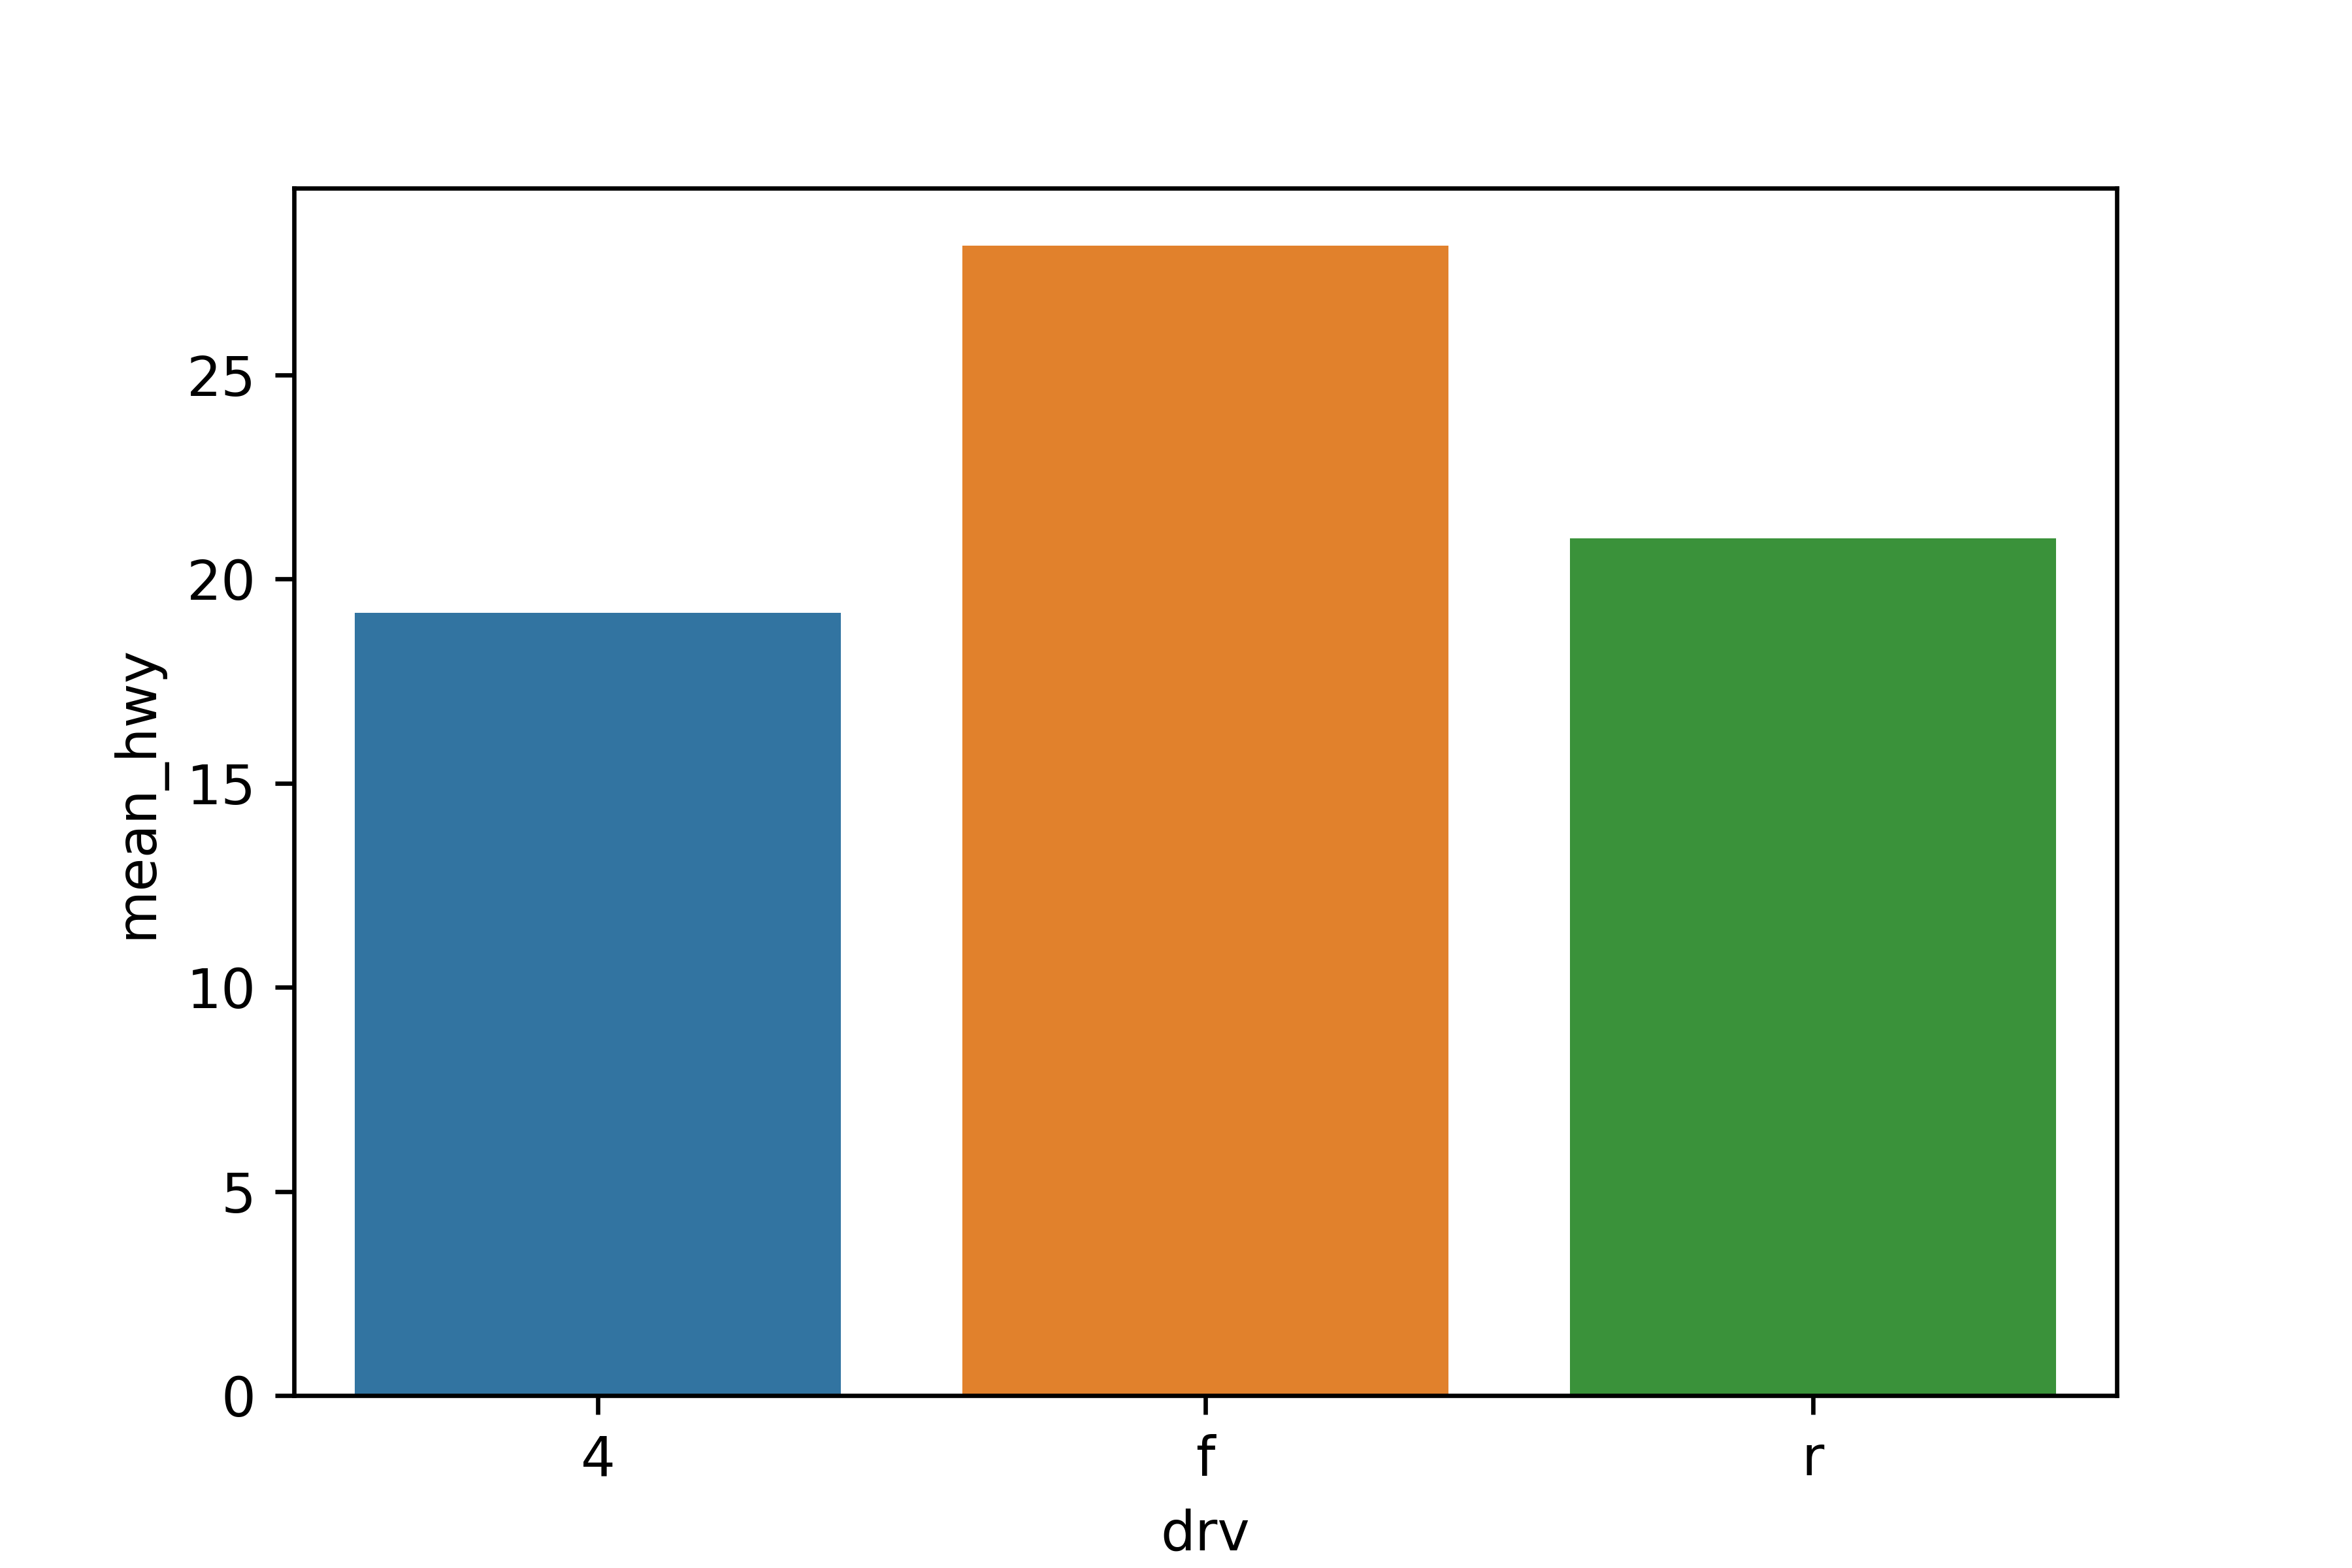


## Lab 1 : 평균 막대 그래프 만들기

### 1. 집단별 평균표 만들기
- 구동방식(drv)별 고속도로 연비 평균 비교 그래프 만들기

In [26]:
mpg = pd.read_csv('mpg.csv')

In [27]:
# 그룹에 사용하는 컬럼(변수)가 기본적으로 인덱스가 된다.
# 컬럼(변수)을 인덱스로 생성하지 않기 위해서 'as_index=False' 사용
df_mpg = mpg.groupby('drv', as_index=False)\
                .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

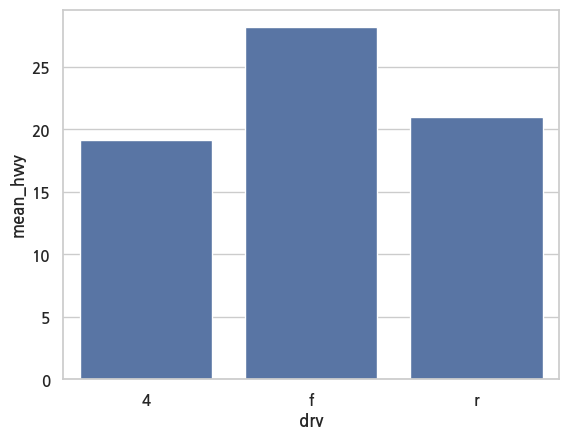

In [28]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [29]:
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


In [30]:
# 만약에 as_index=False를 안쓰면? 
# 'drv'가 index가 됨
# seaborn의 예전 버전은 column에 대해서만 그래프를 그릴수 있었음
# (2023년 이전 버전인 경우 error 발생, 최신 버전은 index로도 그래프 그릴수 있음. 2024년 현재 버전 가능)
df_mpg_index = mpg.groupby('drv')\
                .agg(mean_hwy = ('hwy', 'mean'))
df_mpg_index

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

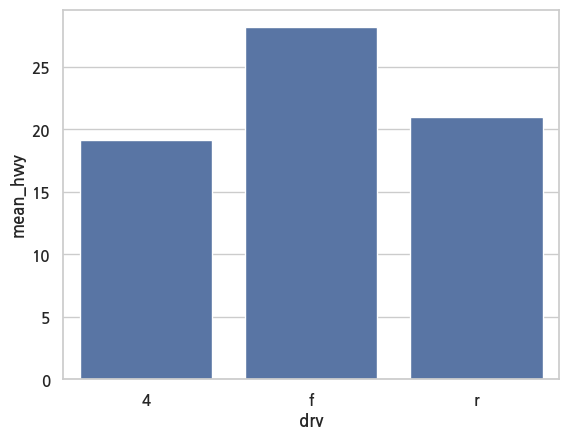

In [31]:
# 만약에 as_index=False를 안쓰면? 
# 'drv'가 index가 됨
# seaborn의 예전 버전은 column에 대해서만 그래프를 그릴수 있었음
# (2023년 이전 버전인 경우 error 발생, 최신 버전은 index로도 그래프 그릴수 있음. 2024년 현재 버전 가능)

sns.barplot(data=df_mpg_index, x='drv', y='mean_hwy')

In [32]:
# 크기 순서로 정렬
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
df_mpg

,drv,mean_hwy
1,f,28.160377
2,r,21.000000
0,4,19.174757


<Axes: xlabel='drv', ylabel='mean_hwy'>

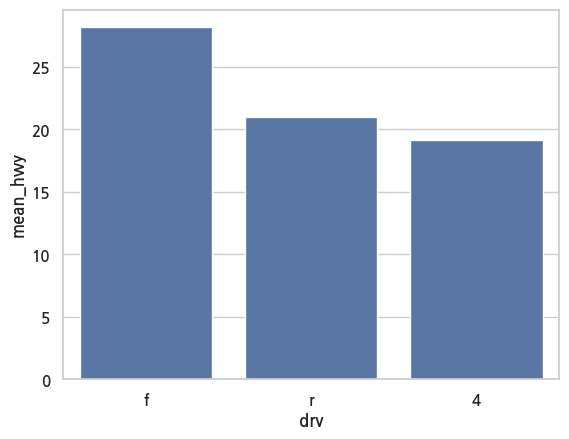

In [33]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

## Lab 2 : 빈도 막대 그래프 만들기

### 1. 집단별 빈도표 만들기
- mpg 데이터에서 구동방식(drv)별 빈도표를 만들기

In [36]:
# 구동방식(drv)별 빈도표 만들기
# groupby를 하면 'drv'로 오름차순 정렬을 해준다. 
df_mpg = mpg.groupby('drv', as_index=False).agg(count_drv=('drv', 'count'))
df_mpg

,drv,count_drv
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='count_drv'>

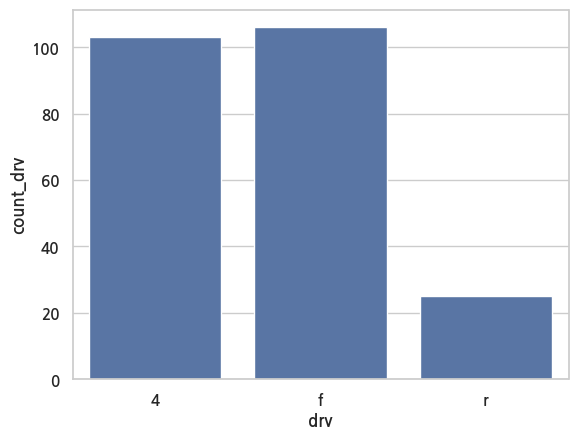

In [37]:
# 구동 방식(drv)별 막대 그래프 만들기
# groupby를 하면 'drv'로 오름차순 정렬을 해준다. 
sns.barplot(data=df_mpg, x='drv',y='count_drv')

<Axes: xlabel='drv', ylabel='count'>

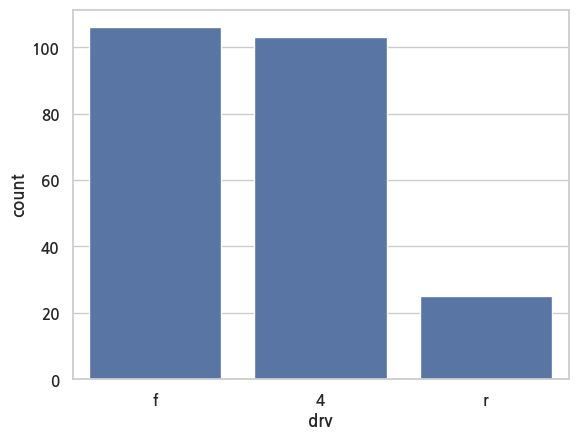

In [38]:
# sns.countplot()으로 빈도 막대 그래프 만들기
# 가장 많은 값 부터 순서대로 나타낸다. 
sns.countplot(data=mpg, x='drv')

<Axes: xlabel='drv', ylabel='count'>

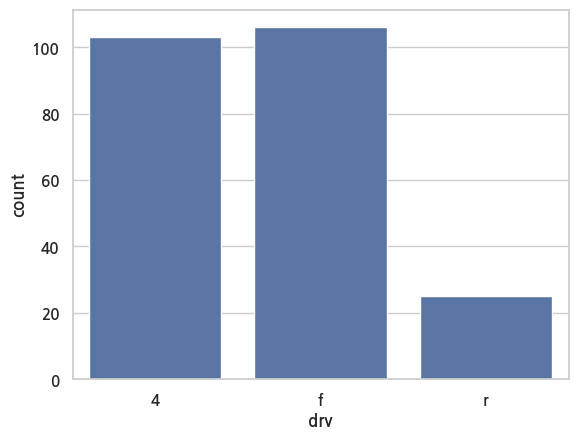

In [39]:
# sns.countplot()으로 빈도 막대 그래프 만들기
# 순서를 변경하고 싶다면, order option을 사용한다.
sns.countplot(data=mpg, x='drv', order = ['4', 'f', 'r'])

### 2. 순서 변경 - 다시 한번 더! 함수에 따라서 값의 order가 변경됨 
- 'model'로 변수로 다시 확인하기
  
1. 먼저 나온 순서대로 정렬 - mpg['model'].unique() 

2. grouby 할때, 'model'의 오름차순으로 정렬 (a->b->c->...) - mpg.groupby('model', as_index=False).agg(model_count=('model','count')).index 

3. 가장 많이 나온 순서대로 정렬 - mpg['model'].value_counts().index

In [41]:
mpg[['model']].head(20)

,model
0,a4
1,a4
2,a4
3,a4
4,a4
5,a4
6,a4
7,a4 quattro
8,a4 quattro
9,a4 quattro


In [42]:
#1) 먼저 나온 순서대로 정렬 
mpg['model'].unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [43]:
model_count_mpg=mpg.groupby('model', as_index=False).agg(model_count=('model','count'))
model_count_mpg

,model,model_count
0,4runner 4wd,6
1,a4,7
2,a4 quattro,8
3,a6 quattro,3
4,altima,6
5,c1500 suburban 2wd,5
6,camry,7
7,camry solara,7
8,caravan 2wd,11
9,civic,9


In [44]:
# 2) model의 오름차순으로 정렬 , a->b->c->d....
model_count_mpg['model'].unique()

array(['4runner 4wd', 'a4', 'a4 quattro', 'a6 quattro', 'altima',
       'c1500 suburban 2wd', 'camry', 'camry solara', 'caravan 2wd',
       'civic', 'corolla', 'corvette', 'dakota pickup 4wd', 'durango 4wd',
       'expedition 2wd', 'explorer 4wd', 'f150 pickup 4wd',
       'forester awd', 'grand cherokee 4wd', 'grand prix', 'gti',
       'impreza awd', 'jetta', 'k1500 tahoe 4wd',
       'land cruiser wagon 4wd', 'malibu', 'maxima', 'mountaineer 4wd',
       'mustang', 'navigator 2wd', 'new beetle', 'passat',
       'pathfinder 4wd', 'ram 1500 pickup 4wd', 'range rover', 'sonata',
       'tiburon', 'toyota tacoma 4wd'], dtype=object)

In [45]:
#자주 나오는 순서대로 정렬해준다.
mpg['model'].value_counts()

model
caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
jetta                      9
dakota pickup 4wd          9
mustang                    9
impreza awd                8
a4 quattro                 8
grand cherokee 4wd         8
a4                         7
toyota tacoma 4wd          7
camry solara               7
camry                      7
tiburon                    7
sonata                     7
passat                     7
f150 pickup 4wd            7
durango 4wd                7
explorer 4wd               6
new beetle                 6
altima                     6
4runner 4wd                6
forester awd               6
gti                        5
c1500 suburban 2wd         5
corolla                    5
corvette                   5
malibu                     5
grand prix                 5
k1500 tahoe 4wd            4
pathfinder 4wd             4
mountaineer 4wd            4
range rover                4
maxima                     3
navigato

In [46]:
#3) 자주 나오는 순서대로 정렬 , 최대빈도가 앞으로 
mpg['model'].value_counts().index

Index(['caravan 2wd', 'ram 1500 pickup 4wd', 'civic', 'jetta',
       'dakota pickup 4wd', 'mustang', 'impreza awd', 'a4 quattro',
       'grand cherokee 4wd', 'a4', 'toyota tacoma 4wd', 'camry solara',
       'camry', 'tiburon', 'sonata', 'passat', 'f150 pickup 4wd',
       'durango 4wd', 'explorer 4wd', 'new beetle', 'altima', '4runner 4wd',
       'forester awd', 'gti', 'c1500 suburban 2wd', 'corolla', 'corvette',
       'malibu', 'grand prix', 'k1500 tahoe 4wd', 'pathfinder 4wd',
       'mountaineer 4wd', 'range rover', 'maxima', 'navigator 2wd',
       'a6 quattro', 'expedition 2wd', 'land cruiser wagon 4wd'],
      dtype='object', name='model')

In [47]:
#1) 먼저 나온 순서대로 정렬  
mpg['model'].unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [48]:
# 2) model의 오름차순으로 정렬 , a->b->c->d....
model_count_mpg['model'].unique()

array(['4runner 4wd', 'a4', 'a4 quattro', 'a6 quattro', 'altima',
       'c1500 suburban 2wd', 'camry', 'camry solara', 'caravan 2wd',
       'civic', 'corolla', 'corvette', 'dakota pickup 4wd', 'durango 4wd',
       'expedition 2wd', 'explorer 4wd', 'f150 pickup 4wd',
       'forester awd', 'grand cherokee 4wd', 'grand prix', 'gti',
       'impreza awd', 'jetta', 'k1500 tahoe 4wd',
       'land cruiser wagon 4wd', 'malibu', 'maxima', 'mountaineer 4wd',
       'mustang', 'navigator 2wd', 'new beetle', 'passat',
       'pathfinder 4wd', 'ram 1500 pickup 4wd', 'range rover', 'sonata',
       'tiburon', 'toyota tacoma 4wd'], dtype=object)

In [49]:
#3) 자주 나오는 순서대로 정렬 , 최대빈도가 앞으로 
mpg['model'].value_counts().index

Index(['caravan 2wd', 'ram 1500 pickup 4wd', 'civic', 'jetta',
       'dakota pickup 4wd', 'mustang', 'impreza awd', 'a4 quattro',
       'grand cherokee 4wd', 'a4', 'toyota tacoma 4wd', 'camry solara',
       'camry', 'tiburon', 'sonata', 'passat', 'f150 pickup 4wd',
       'durango 4wd', 'explorer 4wd', 'new beetle', 'altima', '4runner 4wd',
       'forester awd', 'gti', 'c1500 suburban 2wd', 'corolla', 'corvette',
       'malibu', 'grand prix', 'k1500 tahoe 4wd', 'pathfinder 4wd',
       'mountaineer 4wd', 'range rover', 'maxima', 'navigator 2wd',
       'a6 quattro', 'expedition 2wd', 'land cruiser wagon 4wd'],
      dtype='object', name='model')

<Axes: xlabel='model', ylabel='count'>

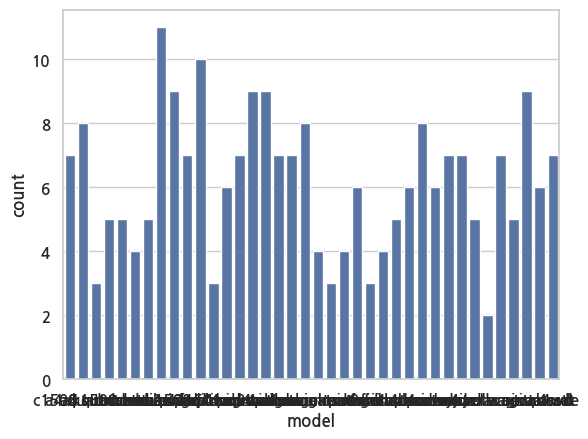

In [50]:
# sns.countplot()으로 빈도 막대 그래프 만들기 
#1) 먼저 나온 순서대로 정렬  
# order = mpg['model'].unique()
sns.countplot(data = mpg, 
              x='model', 
              order = mpg['model'].unique())

<Axes: xlabel='model', ylabel='count'>

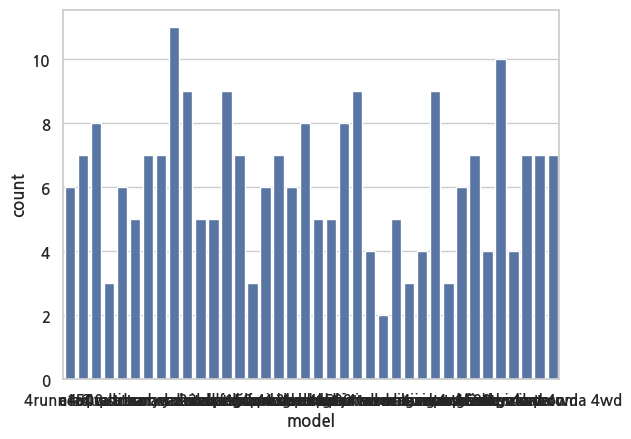

In [51]:
# sns.countplot()으로 빈도 막대 그래프 만들기
# 2) model의 오름차순으로 정렬 , a->b->c->d....
# order = model_count_mpg['model'].unique()
sns.countplot(data = mpg, 
              x='model', 
              order = model_count_mpg['model'].unique())


<Axes: xlabel='model', ylabel='count'>

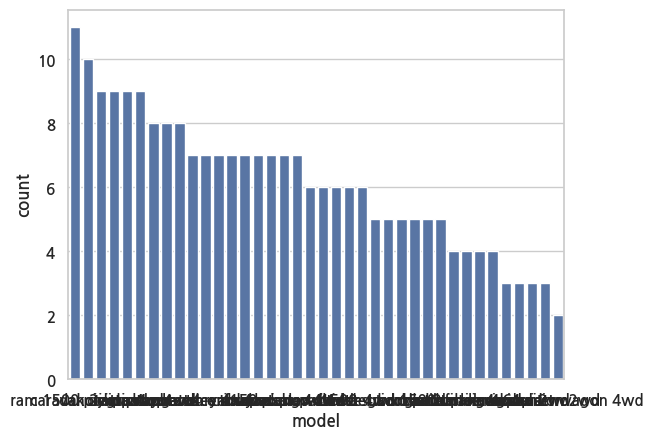

In [52]:
# sns.countplot()으로 빈도 막대 그래프 만들기 
#3) 자주 나오는 순서대로 정렬 , 최대빈도가 앞으로 
# order = mpg['model'].value_counts().index
sns.countplot(data = mpg, 
              x='model', 
              order = mpg['model'].value_counts().index)

<Axes: xlabel='model', ylabel='count'>

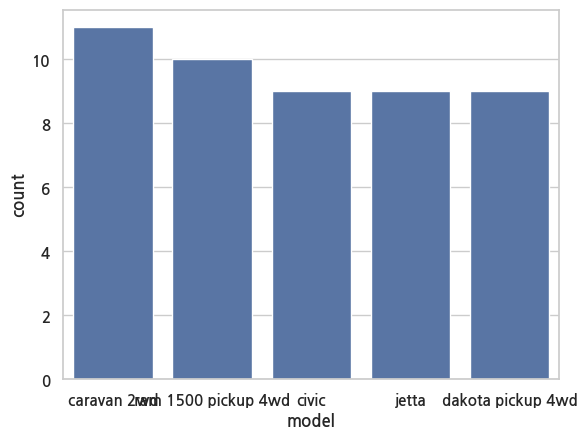

In [53]:
# 갯수를 줄이고 싶으면 head(n)를 사용
sns.countplot(data = mpg, 
              x='model', 
              order = mpg['model'].value_counts().head(5).index)

## Lab 3 : 혼자 해보기 (mpg 데이터 분석)

### Q1 : 'suv' 차종을 대상으로 cty(도시연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현하기

In [56]:
mpg = pd.read_csv('mpg.csv')

In [57]:
mpg_suv_top5= mpg.query('category == "suv"')\
    .groupby("manufacturer", as_index=False)\
        .agg(시티연비평균 = ('cty', 'mean'))\
            .sort_values('시티연비평균', ascending=False)\
            .head(5)\
                    .sort_index()

<Axes: xlabel='manufacturer', ylabel='시티연비평균'>

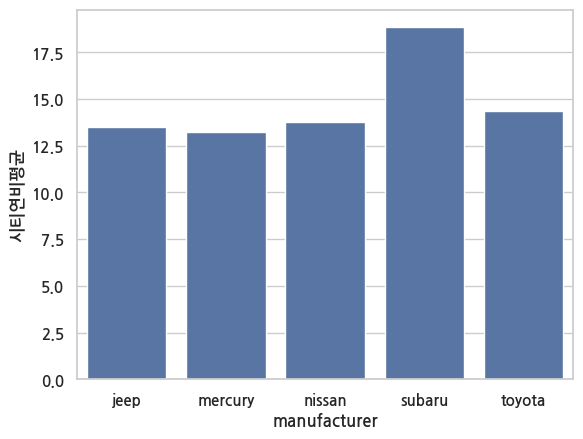

In [58]:
sns.barplot(data = mpg_suv_top5, x="manufacturer", y="시티연비평균" )

In [59]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [60]:
# suv 차량만 추출
mpg.query('category=="suv"').head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [61]:
# suv 차량만 추출
# 회사별로 집단에 대해
# 도시연비 평균을 구함
mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty = ('cty', 'mean'))

,manufacturer,mean_cty
0,chevrolet,12.666667
1,dodge,11.857143
2,ford,12.888889
3,jeep,13.500000
4,land rover,11.500000
5,lincoln,11.333333
6,mercury,13.250000
7,nissan,13.750000
8,subaru,18.833333
9,toyota,14.375000


In [62]:
mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
        .agg(mean_cty = ('cty', 'mean'))\
            .sort_values('mean_cty', ascending=False)

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000
2,ford,12.888889
0,chevrolet,12.666667
1,dodge,11.857143
4,land rover,11.500000
5,lincoln,11.333333


In [63]:
df = mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
        .agg(mean_cty = ('cty', 'mean'))\
            .sort_values('mean_cty', ascending=False).head(5)
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

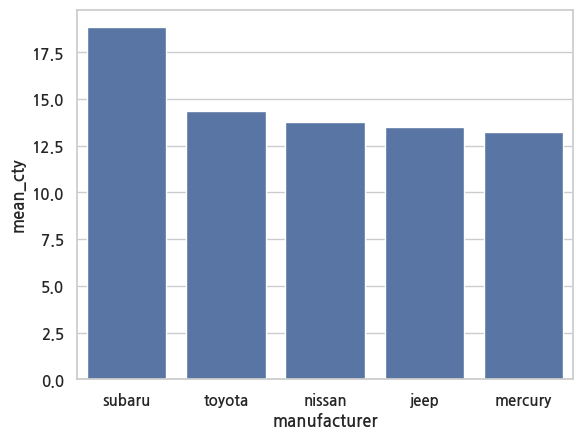

In [64]:
sns.barplot(data=df, x='manufacturer', y='mean_cty')

### Q2 :  자동차 중 어떤 category의 차가 많은지 알아보려고 함
- sns.barplot()을 이용하여 자동차 종류별 빈도를 표현한 그래프를 그리시오
- 막대는 빈도가 높은 순으로 정렬하시오

In [66]:
mpg_category = mpg.groupby('category', as_index=False)\
        .agg(category_totalcount = ('category', 'count'))\
            .sort_values('category_totalcount', ascending=False) 

<Axes: xlabel='category', ylabel='category_totalcount'>

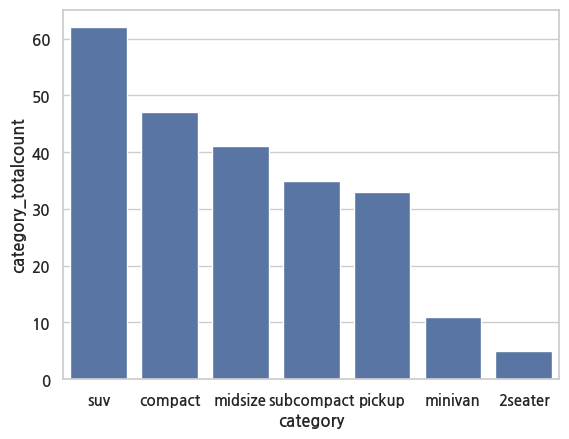

In [67]:
sns.barplot(data =mpg_category, x = "category", y="category_totalcount")

## 08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

- 선 그래프는 데이터를 선으로 표현한 그래프
- 시간에 따라 달라지는 데이터를 표현할 때 자주 사용함
- 시계열 데이터(time series data) : 일별 환율처럼, 일정 시간 간격을 두고 나열된 데이터
- 시계열 그래프(time series chart) : 시계열 데이터를 선으로 표현한 그래프

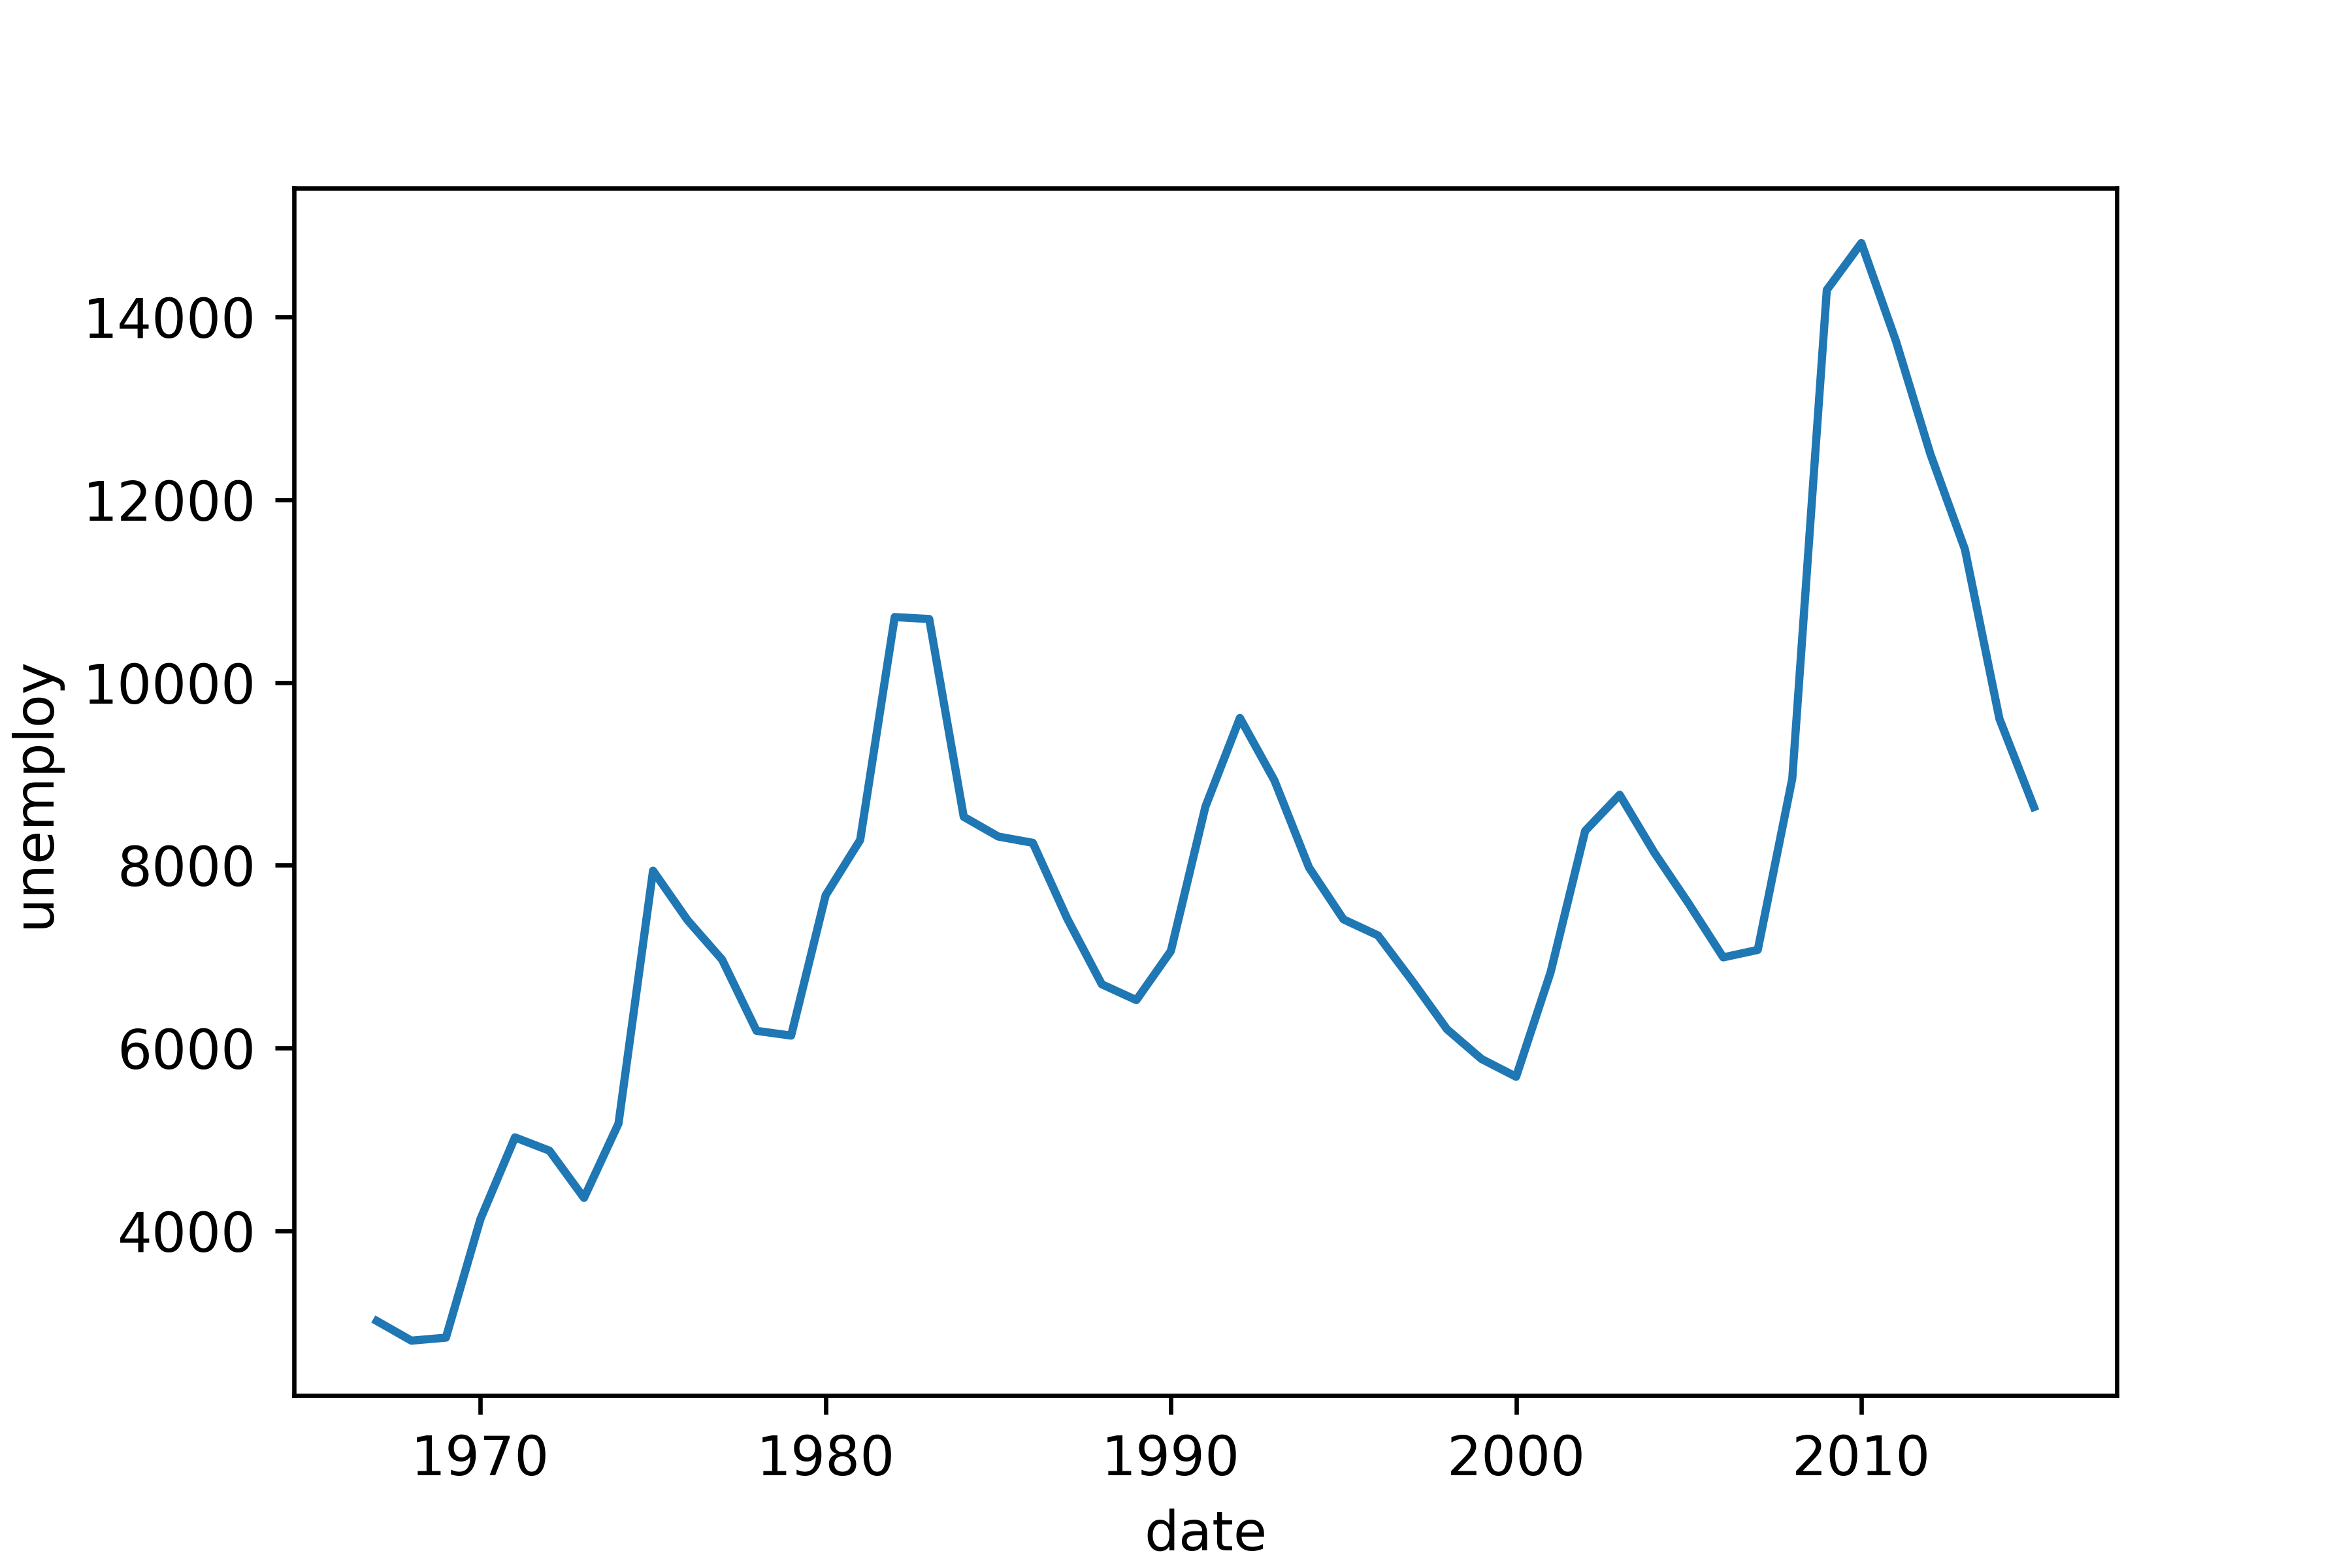

## Lab 1 : 시계열 그래프 만들기 - econimics 데이터 분석
- econimics : 미국의 여러 경제 지표를 월별로 나타낸 그래프
- 시간에 따라 실업자 수가 어떻게 변하는지 시계열 그래프를 만들어 보자
- 출처 : bit.ly/easypy_85

In [70]:
# economics 데이터 불러 오기
import pandas as pd
economics = pd.read_csv('economics.csv')

economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [71]:
economics.shape

(574, 6)

In [72]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [73]:
economics.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,12193.800000,320402.295000,17.300000,25.200000,15352.000000


<Axes: xlabel='date', ylabel='unemploy'>

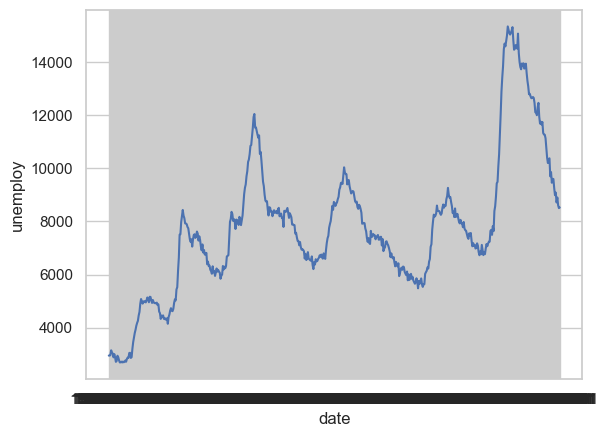

In [74]:
# lineplot()을 이용하여 선 그래프 작성
# x축 date에 여러 날짜가 겹쳐 출력됨
import seaborn as sns
#그래프 스타일 
#style : whitegrid, darkgrid, ticks, white, dark
sns.set_style('whitegrid')
sns.lineplot(data = economics, x = 'date', y='unemploy')

In [75]:
# x 축에 연도 표시
#1967-10-01
economics['date2'] = pd.to_datetime(economics['date'])

In [76]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


- 변수의 타입을 날짜 시간 타입으로 변경하여도 값이 달라지지 않음
- 날짜 시간 타입 데이타는 df.dt를 이용하여 연, 월, 일을 추출할 수 있음

In [78]:
economics[['date', 'date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [79]:
# 연, 월, 일 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [80]:
# 연, 월, 일 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [81]:
# 연, 월, 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

- 연도 변수만들기

In [83]:
# 연도 변수 추가하기
economics['year'] = economics['date2'].dt.year
economics['month'] = economics['date2'].dt.month
economics['day'] = economics['date2'].dt.day
economics.head(10)

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month,day
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967,7,1
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967,8,1
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967,9,1
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967,10,1
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967,11,1
5,1967-12-01,525.1,199657.0,11.8,4.8,3018,1967-12-01,1967,12,1
6,1968-01-01,530.9,199808.0,11.7,5.1,2878,1968-01-01,1968,1,1
7,1968-02-01,533.6,199920.0,12.3,4.5,3001,1968-02-01,1968,2,1
8,1968-03-01,544.3,200056.0,11.7,4.1,2877,1968-03-01,1968,3,1
9,1968-04-01,544.0,200208.0,12.3,4.6,2709,1968-04-01,1968,4,1


- x축에 연도 표기하기

<Axes: xlabel='year', ylabel='unemploy'>

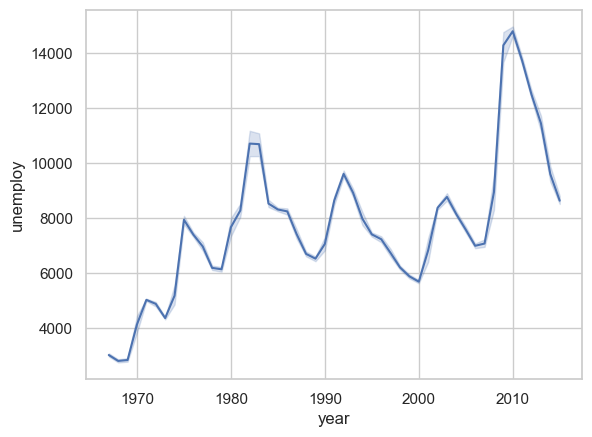

In [85]:
# x 축에 연도 표기
# 선은 추정 회귀선을 의미, 그림자는 신뢰구간을 표시 95% (sampling을 통해서 얻어내는 값이라서, 오차가 있을수 있음)
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

In [86]:
economics.query('year == 1982')['unemploy'].to_frame().describe()

,unemploy
count,12.000000
mean,10714.916667
std,856.415942
min,9397.000000
25%,10156.750000
50%,10693.500000
75%,11295.000000
max,12051.000000


<Axes: xlabel='year', ylabel='unemploy'>

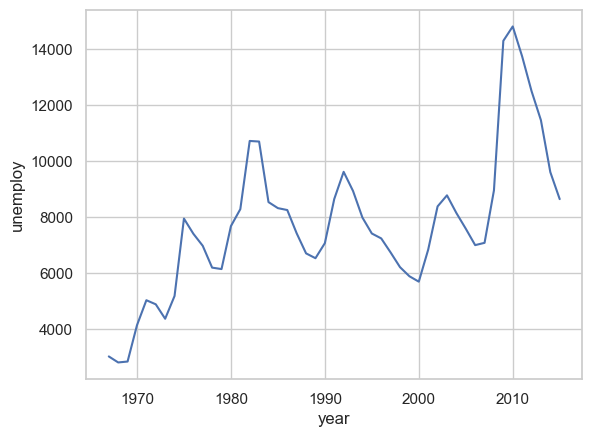

In [87]:
# x 축에 연도 표기 (선 위 아래 표시 면적은 신뢰구간, 오차가 존재할수 있는 구간을 표시해줌)
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar=None)

- (그래프 분석) 실업자 수가 약 5년을 주기로 등락을 반복함
- 2005년 부터 급격히 증가 했다가 2010년 부터 다시 감소 추세

## Lab 2 : 혼자서 해보기 (economics 데이터 분석 그래프 만들기)
- economics 데이터에서 개인저축률(psavert)을 분석해 보기

### Q1 : psavert(개인 저축률)가 시간에 따라 어떻게 변해왔는지, 연도별 개인 저축률의 변화 그래프를 만들어 보자

In [91]:
import pandas as pd
import seaborn as sns
economics = pd.read_csv('economics.csv')

In [92]:
economics['date2'] = pd.to_datetime(economics['date'])

In [93]:
economics['year'] = economics['date2'].dt.year

In [94]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='psavert'>

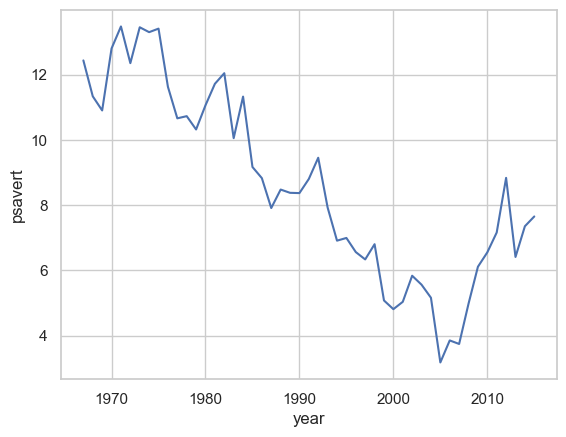

In [95]:
sns.lineplot(data=economics, x = 'year', y = 'psavert',  errorbar=None)

- 데이터가 수집된 1970년부터 역 2005년까지 지속적으로 개인 저축률이 감소하다가 2005년 부터 다시 증가하기 시작함

### Q2 : 2014년 월별 psavert(개인 저축률)의 변화를 시계열 그래프로 그려보세요
- df.query() 사용

In [98]:
economics['month'] = economics['date2'].dt.month

In [99]:
df_2014 = economics.query('year == 2014')

In [100]:
df_2014.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
558,2014-01-01,11512.5,317593.923,7.1,15.4,10202,2014-01-01,2014,1
559,2014-02-01,11566.2,317753.883,7.3,15.9,10349,2014-02-01,2014,2
560,2014-03-01,11643.0,317917.203,7.4,15.8,10380,2014-03-01,2014,3
561,2014-04-01,11702.6,318089.218,7.4,15.7,9702,2014-04-01,2014,4
562,2014-05-01,11748.4,318269.505,7.4,14.6,9859,2014-05-01,2014,5


<Axes: xlabel='month', ylabel='psavert'>

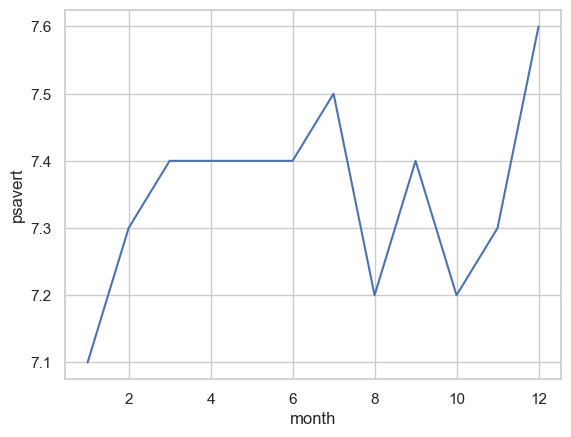

In [101]:
sns.lineplot(data=df_2014, x='month', y='psavert',  errorbar=None)

## 08-5 상자 그림 - 집단 간 분포 차이 표현하기

- 상자 그림(Box Plot)은 데이터가 퍼져있는 형태를 직사각형 상자 모양으로 표현한 그래프

    - 데이터가 어떻게 분포하고 있는지 알 수 있다.
    - 평균값만 볼 때보다 데이터의 특징을 더 자세히 이해할 수 있다.
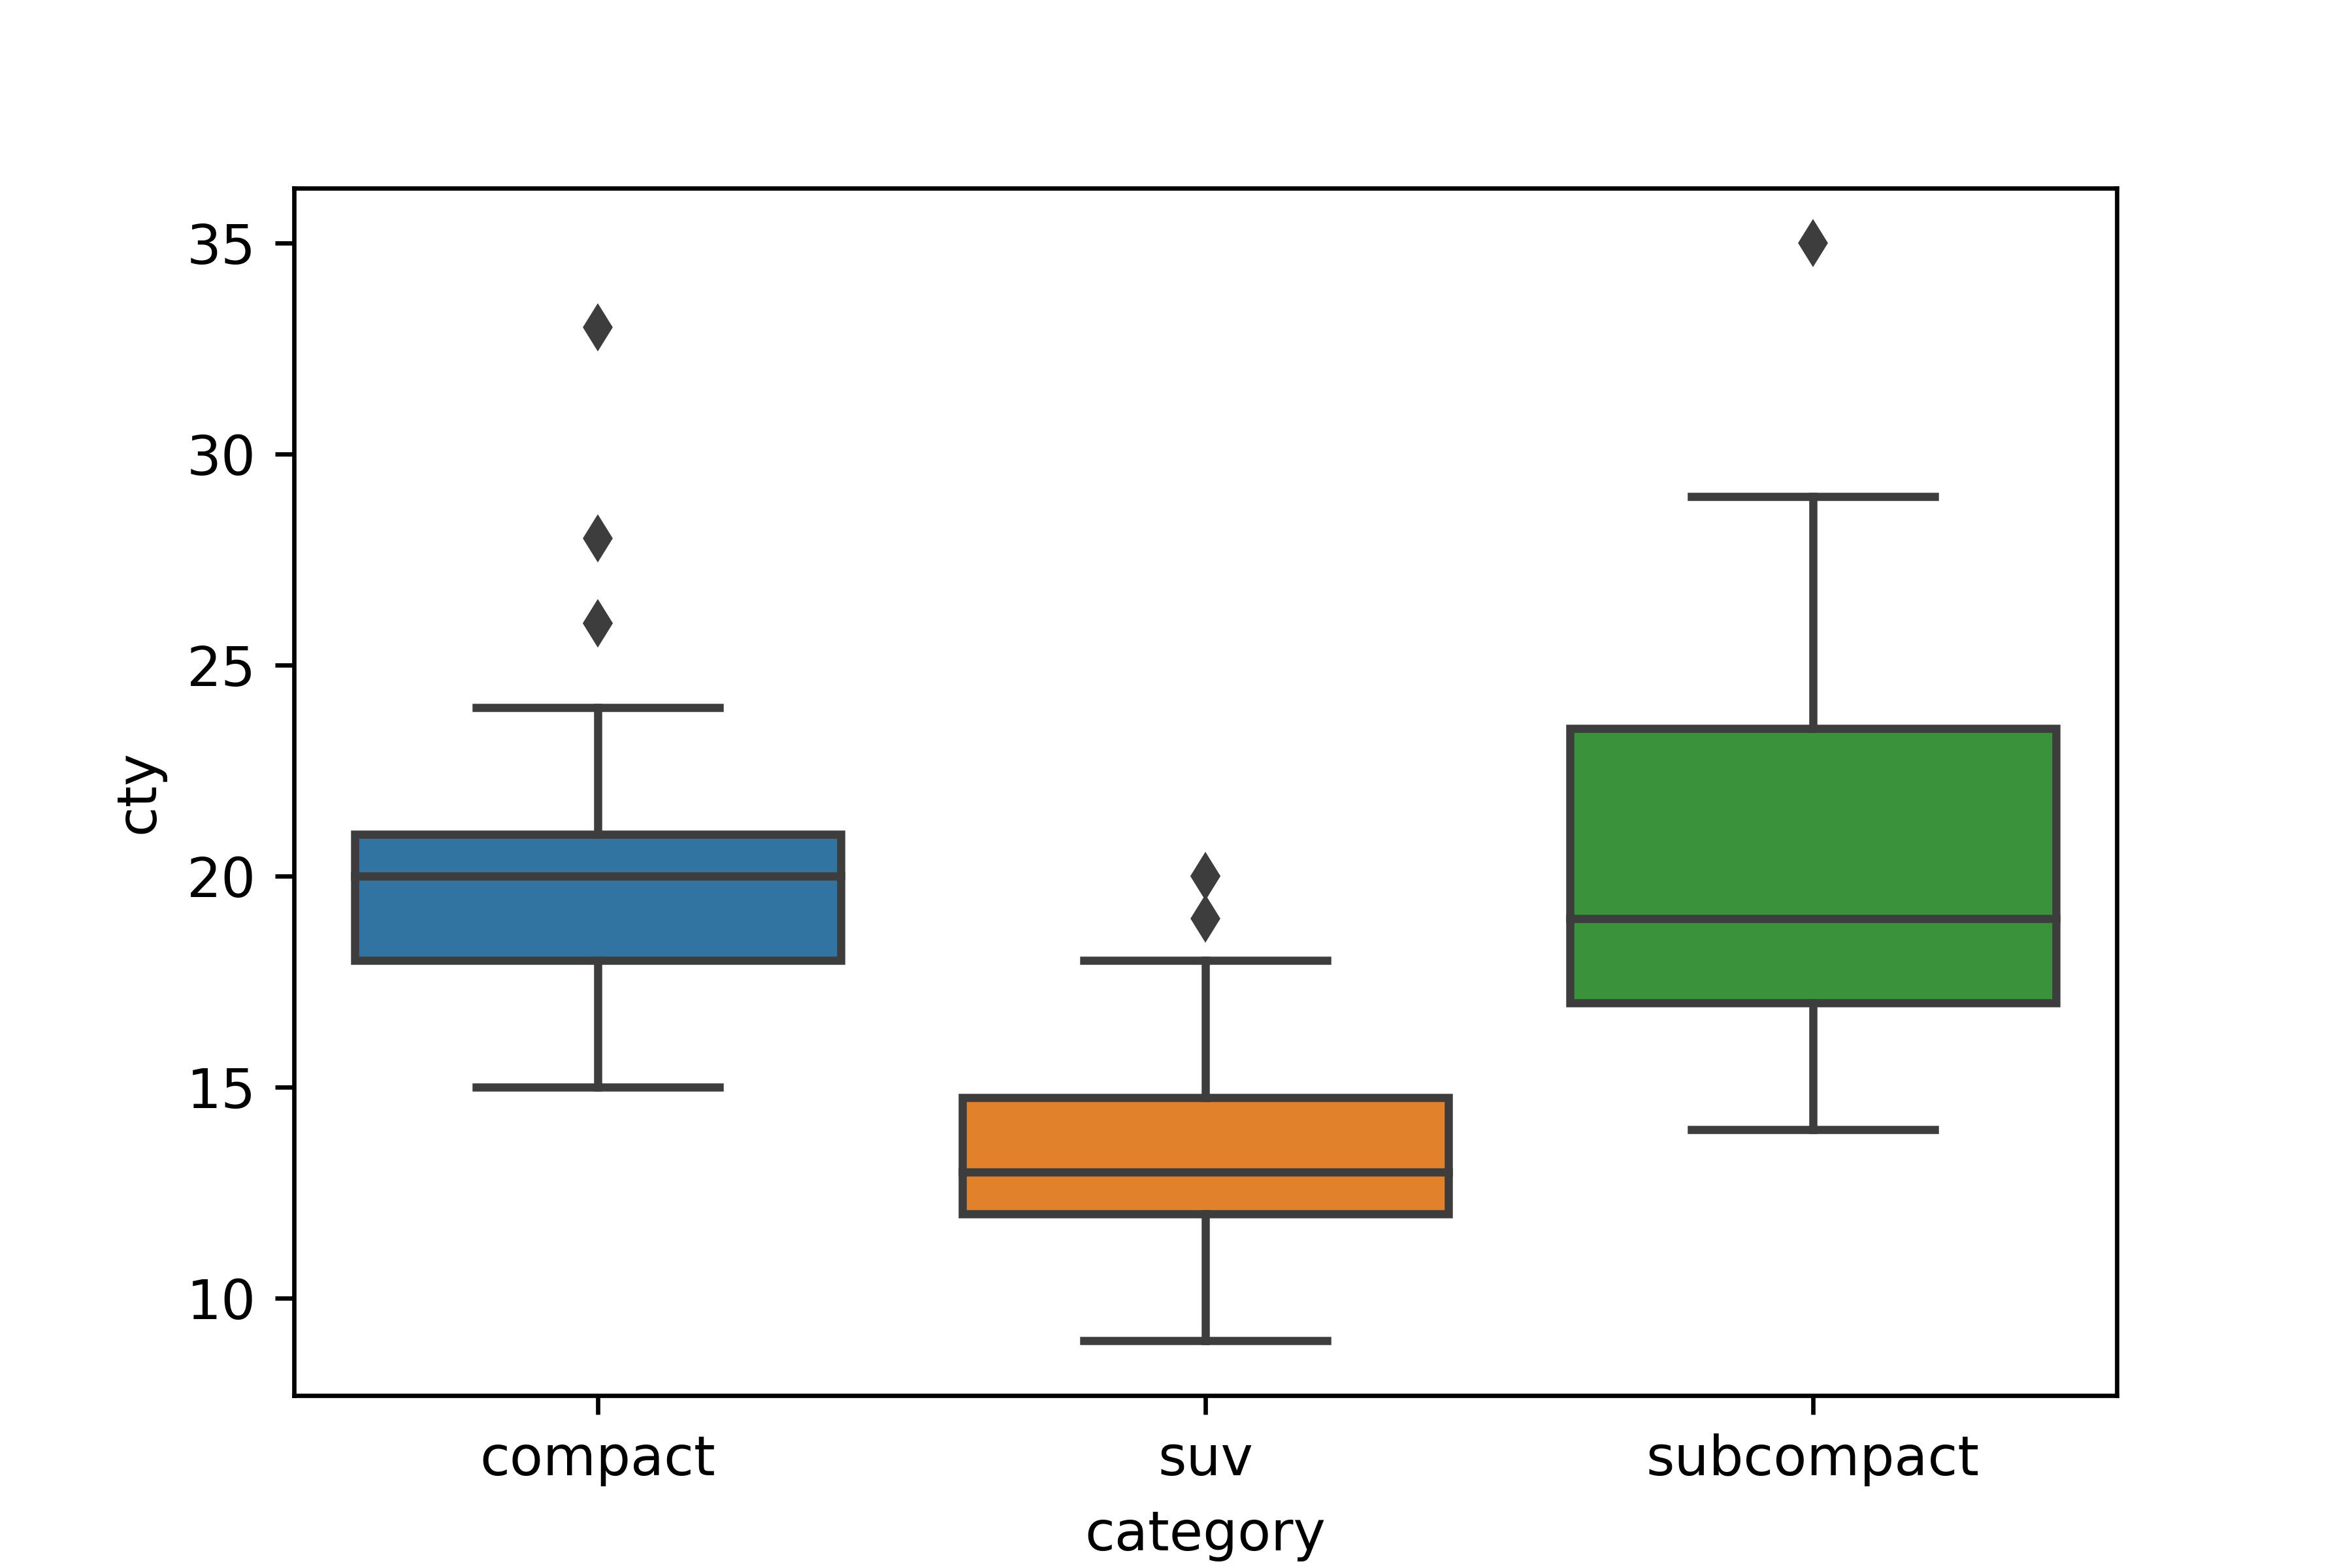


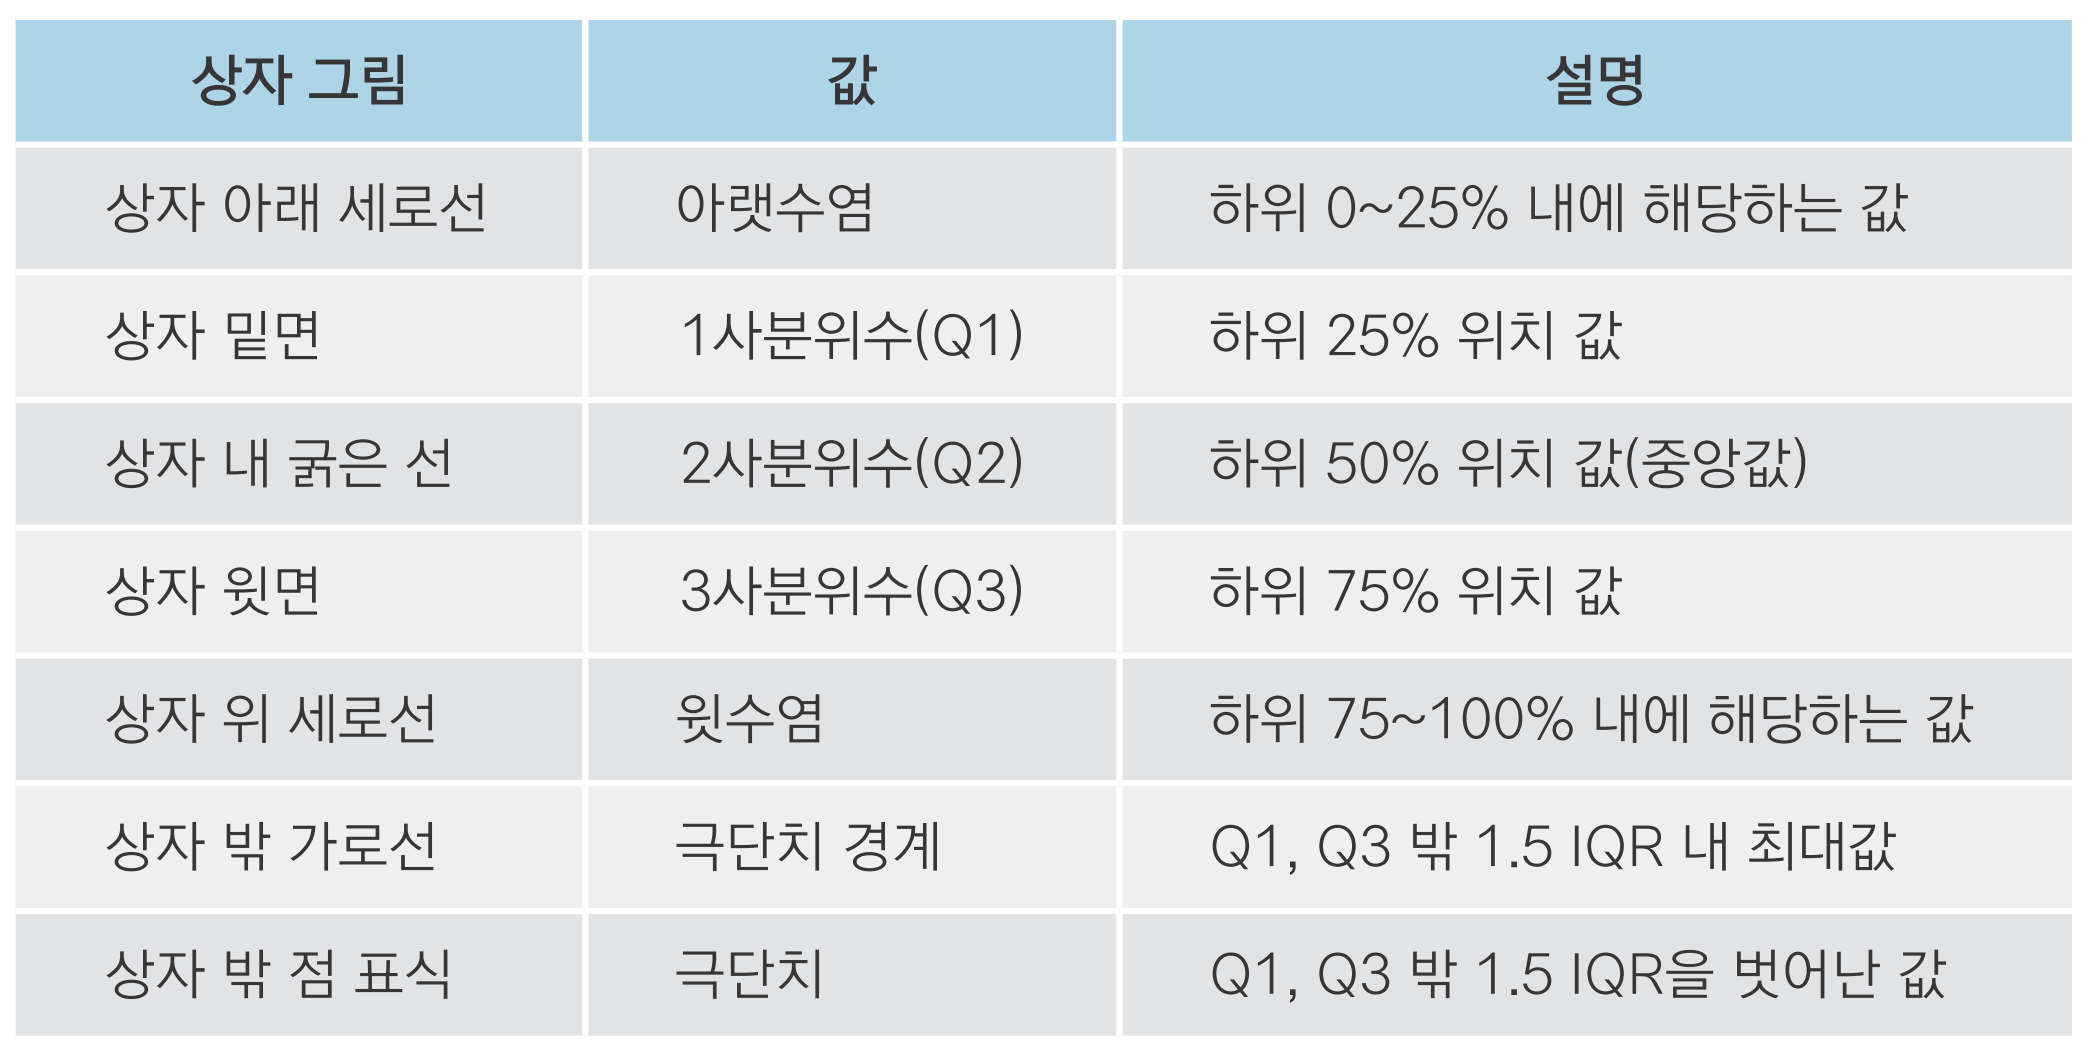

## Lab 1 : 상자 그림 만들기
- mpg 데이터를 이용하여 '구동방식(drv)별 고속도로 연비(hwy)'를 표현하기

In [105]:
import pandas as pd
import seaborn as sns
mpg = pd.read_csv('mpg.csv')

<Axes: xlabel='drv', ylabel='hwy'>

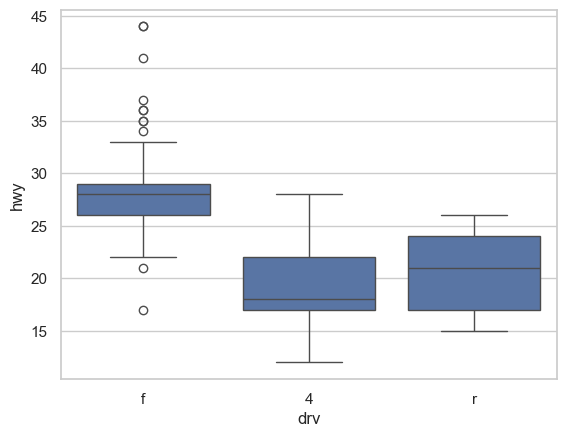

In [106]:
sns.boxplot(data=mpg, x='drv', y='hwy')

- 전륜 구동(f)은 연비가 평균적으로 높고, 연비가 극단적으로 높거나 낮은 자동차가 존재함
- 4륜 구종(4)은 연비 평균이 다른 구동방식에 비해 낮음
- 후륜 구동(r)은 극단치가 없고, 자동차 대부분이 사분위 범위에 포함됨

## Lab 2 : 혼자해 보기 - mpg 데이터를 분석해 보기
- mpg 데이터를 이용하여 '자동차 종류별 도시 연비'를 비교해 보시오

### Q1 : 자동차 종류(category)중 'compact', 'subcompact', 'suv' 차종에 대한 도시 연비(cty)를 비교해 보시오
- df.query() 사용
- sns.boxplot()

In [110]:
import pandas as pd
import seaborn as sns

In [111]:
#  mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

In [112]:
# "compact", "subcompact", "suv" 차종 데이터 추출
df = mpg.query('category in ["compact", "subcompact", "suv"]')
df.value_counts()

manufacturer  model               displ  year  cyl  trans       drv  cty  hwy  fl  category  
honda         civic               1.6    1999  4    auto(l4)    f    24   32   r   subcompact    2
chevrolet     c1500 suburban 2wd  5.3    2008  8    auto(l4)    r    14   20   r   suv           2
ford          explorer 4wd        4.0    1999  6    auto(l5)    4    14   17   r   suv           2
dodge         durango 4wd         4.7    2008  8    auto(l5)    4    13   17   r   suv           2
subaru        impreza awd         2.5    2008  4    auto(s4)    4    20   27   r   compact       1
                                                                                                ..
ford          mustang             4.6    1999  8    manual(m5)  r    15   22   r   subcompact    1
                                                    auto(l4)    r    15   21   r   subcompact    1
                                  4.0    2008  6    manual(m5)  r    17   26   r   subcompact    1
               

<Axes: xlabel='category', ylabel='cty'>

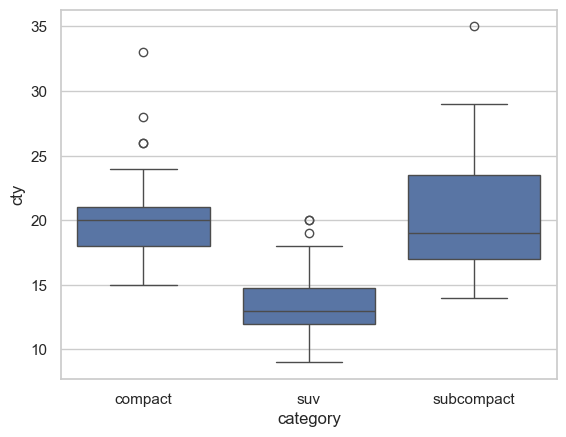

In [113]:
# 상자 그림 만들기
sns.boxplot(data=df, x='category', y='cty')

- suv의 도시 연비가 가장 낮음

## summary
#### 08-1 파이썬으로 만들수 있는 그래프 살펴보기
#### 08-2 산점도 - 변수 간 관계 표현하기
#### 08-3 막대 그래프 - 집단 간 차이 표현하기
#### 08-4 시계열 그래프 - 시간에 따라 달라지는 데이터 표현하기
#### 08-5 상자그림 - 집단 간 분포 차이 표현하기

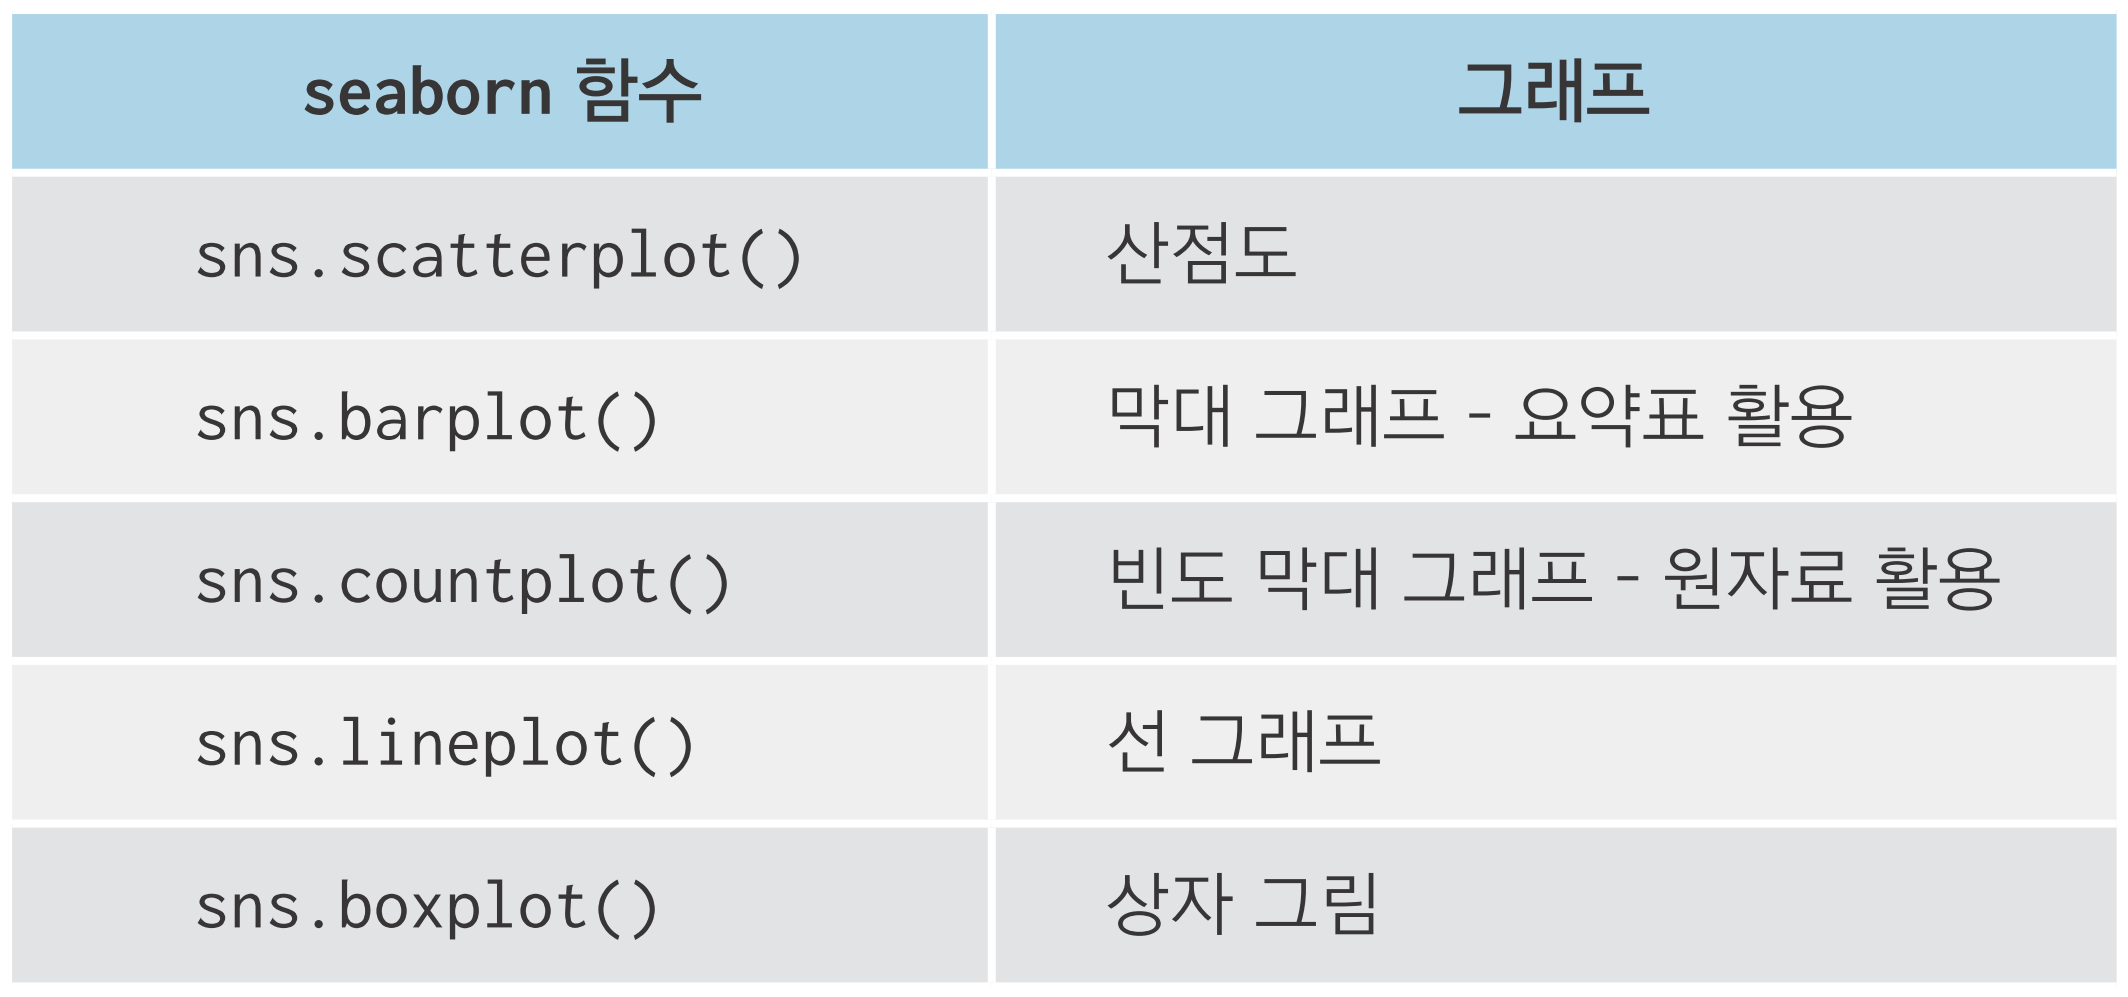

In [ ]:
# 1. 산점도
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

# 축 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = [3, 6], ylim = [10, 30])

# 종류별로 표식 색깔 바꾸기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')


# 2. 막대 그래프

# 평균 막대 그래프

# 1단계. 평균표 만들기
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))

# 2단계. 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

## 빈도 막대 그래프
sns.countplot(data = mpg, x = 'drv')
### 3. 선 그래프
sns.lineplot(data = economics, x = 'date', y = 'unemploy')


# 4. 상자 그림
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')